In [ ]:
!unzip /content/drive/MyDrive/open.zip

Archive:  /content/drive/MyDrive/open.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
import numpy as np
import pandas as pd
import random
import os
import gc

In [ ]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
seed_everything(42)

In [ ]:
def csv_to_parquet(csv_path, save_name):
    df = pd.read_csv(csv_path)
    df.to_parquet(f'./{save_name}.parquet')
    del df
    gc.collect()

In [ ]:
csv_to_parquet('./train.csv', 'train')
csv_to_parquet('./test.csv', 'test')

In [ ]:
train = pd.read_parquet('./train.parquet')
test = pd.read_parquet('./test.parquet')
sample_submission = pd.read_csv('sample_submission.csv', index_col = 0)

In [ ]:
train.head()

,ID,first_party,second_party,facts,first_party_winner
0,TRAIN_0000,Phil A. St. Amant,Herman A. Thompson,"On June 27, 1962, Phil St. Amant, a candidate ...",1
1,TRAIN_0001,Stephen Duncan,Lawrence Owens,Ramon Nelson was riding his bike when he suffe...,0
2,TRAIN_0002,Billy Joe Magwood,"Tony Patterson, Warden, et al.",An Alabama state court convicted Billy Joe Mag...,1
3,TRAIN_0003,Linkletter,Walker,Victor Linkletter was convicted in state court...,0
4,TRAIN_0004,William Earl Fikes,Alabama,"On April 24, 1953 in Selma, Alabama, an intrud...",1


In [ ]:
test.head()

,ID,first_party,second_party,facts
0,TEST_0000,Salerno,United States,The 1984 Bail Reform Act allowed the federal c...
1,TEST_0001,Milberg Weiss Bershad Hynes and Lerach,"Lexecon, Inc.",Lexecon Inc. was a defendant in a class action...
2,TEST_0002,No. 07-582\t Title: \t Federal Communications ...,"Fox Television Stations, Inc., et al.","In 2002 and 2003, Fox Television Stations broa..."
3,TEST_0003,Harold Kaufman,United States,During his trial for armed robbery of a federa...
4,TEST_0004,Berger,Hanlon,"In 1993, a magistrate judge issued a warrant a..."


In [ ]:
sample_submission.head()

,first_party_winner
ID,
TEST_0000,0
TEST_0001,0
TEST_0002,0
TEST_0003,0
TEST_0004,0


In [ ]:
train.drop(columns = ['ID'], inplace = True)
test.drop(columns = ['ID'], inplace = True)
train.head()

,first_party,second_party,facts,first_party_winner
0,Phil A. St. Amant,Herman A. Thompson,"On June 27, 1962, Phil St. Amant, a candidate ...",1
1,Stephen Duncan,Lawrence Owens,Ramon Nelson was riding his bike when he suffe...,0
2,Billy Joe Magwood,"Tony Patterson, Warden, et al.",An Alabama state court convicted Billy Joe Mag...,1
3,Linkletter,Walker,Victor Linkletter was convicted in state court...,0
4,William Earl Fikes,Alabama,"On April 24, 1953 in Selma, Alabama, an intrud...",1


In [ ]:
test.head()

,first_party,second_party,facts
0,Salerno,United States,The 1984 Bail Reform Act allowed the federal c...
1,Milberg Weiss Bershad Hynes and Lerach,"Lexecon, Inc.",Lexecon Inc. was a defendant in a class action...
2,No. 07-582\t Title: \t Federal Communications ...,"Fox Television Stations, Inc., et al.","In 2002 and 2003, Fox Television Stations broa..."
3,Harold Kaufman,United States,During his trial for armed robbery of a federa...
4,Berger,Hanlon,"In 1993, a magistrate judge issued a warrant a..."


In [ ]:
train['first_party'].value_counts()

United States       154
Illinois              9
Maryland              8
Florida               8
New York              7
                   ... 
David Carpenter       1
Larry Gene Heath      1
PGA TOUR, Inc.        1
PPL Montana, LLC      1
Markman               1
Name: first_party, Length: 2110, dtype: int64

In [ ]:
train['first_party'].value_counts()[:30]

United States                                                   154
Illinois                                                          9
Maryland                                                          8
Florida                                                           8
New York                                                          7
United States of America                                          7
Michigan                                                          7
California                                                        7
Federal Election Commission                                       5
Arizona                                                           5
National Association for the Advancement of Colored People        5
Johnson                                                           5
Immigration and Naturalization Service                            4
Mitchell                                                          4
Washington                                      

In [ ]:
train['first_party'].value_counts().index

Index(['United States', 'Illinois', 'Maryland', 'Florida', 'New York',
       'United States of America', 'Michigan', 'California',
       'Federal Election Commission', 'Arizona',
       ...
       'Pat Osborn',
       'Ashbel T. Wall, II, Director of Rhode Island Department of Corrections',
       'Azel P. Smith, et al.', 'Quality King Distributors, Inc.',
       'World Wide Volkswagen Corp., Seaway Volkswagen Inc.',
       'David Carpenter', 'Larry Gene Heath', 'PGA TOUR, Inc.',
       'PPL Montana, LLC', 'Markman'],
      dtype='object', length=2110)

In [ ]:
np.unique(train['first_party'], return_counts=True)

(array(['14 Penn Plaza LLC, et al.', '44 Liquormart Inc.',
        'A. Neil Clark, Field Office Director, Seattle, Washington, Immigration and Customs Enforcement, et al.',
        ..., 'Zurcher', 'eBay Inc. et al.',
        'ohn E. Wetzel, Secretary, Pennsylvania Department of Corrections, et al.'],
       dtype=object),
 array([1, 1, 1, ..., 1, 1, 1]))

In [ ]:
def categorize_first_party(df, cat = 'first_party_cat', party = 'first_party'):
    states = [
    'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
    'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
    'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
    'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
    'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
    'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota',
    'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
    'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia',
    'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'
    ]

    df[cat] = 0

    import re

    states_pattern = '|'.join(states)
    states_index = df[df[party].str.contains(states_pattern, flags=re.IGNORECASE, regex=True)].index

    company_terms = ['Corporation', r'Co\.', r'Ltd\.', 'company', r'Inc\.', r'LLC\,', r'LLC\.', 'LLC', 'LLP']
    company_index = [df[df[party].str.contains(term, case=False)].index.values for term in company_terms]
    companies_index = pd.Index(set([num for sublist in company_index for num in sublist]))

    community_index = df[df[party].str.contains('community', case=False)].index.values

    attorney_index = df[df[party].str.contains('attorney', case=False)].index.values

    country_index = df[df[party].str.contains('United States', case=False)].index.values

    federal_index = df[df['first_party'].str.contains('Federal', case=False)].index.values

    df.loc[states_index, cat] = 'states'
    df.loc[companies_index, cat] = 'companies'
    df.loc[community_index, cat] = 'community'
    df.loc[attorney_index, cat] = 'attorney'
    df.loc[country_index, cat] = 'country'
    df.loc[federal_index, 'first_party_cat'] = 'federal'
    df[cat] = df[cat].replace({0:'rest'})

    return df

In [ ]:
train = categorize_first_party(train, cat = 'first_party_cat', party = 'first_party')
train.head()

,first_party,second_party,facts,first_party_winner,first_party_cat
0,Phil A. St. Amant,Herman A. Thompson,"On June 27, 1962, Phil St. Amant, a candidate ...",1,rest
1,Stephen Duncan,Lawrence Owens,Ramon Nelson was riding his bike when he suffe...,0,rest
2,Billy Joe Magwood,"Tony Patterson, Warden, et al.",An Alabama state court convicted Billy Joe Mag...,1,rest
3,Linkletter,Walker,Victor Linkletter was convicted in state court...,0,rest
4,William Earl Fikes,Alabama,"On April 24, 1953 in Selma, Alabama, an intrud...",1,rest


In [ ]:
train['first_party_cat'].value_counts()

rest         1527
companies     412
states        298
country       180
attorney       29
federal        20
community      12
Name: first_party_cat, dtype: int64

In [ ]:
vc_train = train[train['first_party_cat'] == 'rest']['first_party'].value_counts()
vc_train[vc_train > 2]

Johnson                                                       5
National Association for the Advancement of Colored People    5
Immigration and Naturalization Service                        4
Harris                                                        4
Brown                                                         4
Mitchell                                                      4
Lewis                                                         4
Reno                                                          4
Smith                                                         4
Lujan                                                         3
City of Los Angeles                                           3
Jones                                                         3
Martinez                                                      3
Securities and Exchange Commission                            3
Bush                                                          3
Nixon                                   

In [ ]:
train[(train['first_party'].str.contains('Service', case = False)) & (train['first_party_cat'] == 'rest')]

,first_party,second_party,facts,first_party_winner,first_party_cat
161,"Kathleen Sebelius, Secretary of Health and Hum...","Melissa Cloer, M.D.","While a student at the University of Missouri,...",0,rest
385,"Otis R. Bowen, Secretary of Health and Human S...","Beaty Mae Gilliard, et al.","Until 1984, the statutes governing Aid to Fami...",1,rest
478,"John Lascaris, Commissioner, Dept. of Social S...","Sylvia Shirley, Elizabeth Anderson, Jane Doe",Respondents alleged that a section the New Yor...,0,rest
747,Selective Service System,Minnesota Public Interest Research Group,Part of the Department of Defense Authorizatio...,1,rest
928,Immigration & Naturalization Service,Aguirre-Aguirre,While the Immigration and Nationality Act (INA...,1,rest
929,Mac's Shell Service et al.,Shell Oil Products Co. et al.,Gas station franchisees won a verdict against ...,0,rest
1042,Immigration and Naturalization Service,Yueh-Shaio Yang,"Yueh-Shaio Yang and his wife, former Taiwan re...",1,rest
1197,"Alex M. Azar, II, Secretary of Health and Huma...","Rochelle Garza, as Guardian ad Litem to Unacco...",Jane Doe entered the United States as an unacc...,0,rest
1216,"Kathleen Sebelius, Secretary of Health and Hum...",Auburn Regional Medical Center et al.,Hospitals receive compensation from the federa...,1,rest
1237,Immigration and Naturalization Service,Fredy Orlando Ventura,Fredy Orlando Ventura illegally entered the Un...,1,rest


In [ ]:
train.iloc[2235, 4] = 'companies'

In [ ]:
train.loc[((train['first_party'].str.contains('Republic', case = False)) & (train['first_party_cat'] == 'rest')), 'first_party_cat'] = 'country'

In [ ]:
train.to_csv('./train_first_party_cat.csv', index=False)

In [ ]:
train = pd.read_csv('/content/df_court_train.csv')
test = pd.read_csv('/content/df_court_test.csv')

In [ ]:
train.groupby(['first_party_cat', 'second_party_cat'])[['first_party_winner']].sum()

first_party_winner
first_party_cat second_party_cat                    
community       community                          5
                companies                         11
                country                            1
                federal                            5
                rest                              26
                states                            14
companies       community                          9
                companies                         77
                country                           23
                federal                           13
                rest                             145
                states                            38
country         community                          4
                companies                         22
                country                            1
                rest                              94
                states                             6
federal         community                          7
                companies                         14
                country                            0
                federal                            3
                rest                              90
                states                             1
rest            community                         22
                companies                         84
                country                          121
                federal                           66
                rest                             293
                states                           200
states          community                         14
                companies                         21
                country                            6
                federal                            9
                rest                             195
                states                             9

In [ ]:
train['first_simple_cat'] = 'init'

train.loc[((train['first_party_cat'] == 'states') | (train['first_party_cat'] == 'country') | (train['first_party_cat'] == 'federal')), 'first_simple_cat'] = 'government'
train.loc[((train['first_party_cat'] == 'companies') | (train['first_party_cat'] == 'community')), 'first_simple_cat'] = 'private'
train.loc[(train['first_party_cat'] == 'rest'), 'first_simple_cat'] = 'individual'

train['first_simple_cat'].value_counts()

individual    1233
government     690
private        555
Name: first_simple_cat, dtype: int64

In [ ]:
train['second_simple_cat'] = 'init'

train.loc[((train['second_party_cat'] == 'states') | (train['second_party_cat'] == 'country') | (train['second_party_cat'] == 'federal')), 'second_simple_cat'] = 'government'
train.loc[((train['second_party_cat'] == 'companies') | (train['second_party_cat'] == 'community')), 'second_simple_cat'] = 'private'
train.loc[(train['second_party_cat'] == 'rest'), 'second_simple_cat'] = 'individual'

train['second_simple_cat'].value_counts()

individual    1204
government     825
private        449
Name: second_simple_cat, dtype: int64

In [ ]:
train.head()

,first_party,second_party,facts,first_party_winner,first_party_cat,second_party_cat,court,first_simple_cat,second_simple_cat
0,Phil A. St. Amant,Herman A. Thompson,"On June 27, 1962, Phil St. Amant, a candidate ...",1,rest,rest,Supreme,individual,individual
1,Stephen Duncan,Lawrence Owens,Ramon Nelson was riding his bike when he suffe...,0,rest,rest,Appeal,individual,individual
2,Billy Joe Magwood,"Tony Patterson, Warden, et al.",An Alabama state court convicted Billy Joe Mag...,1,rest,rest,Appeal,individual,individual
3,Linkletter,Walker,Victor Linkletter was convicted in state court...,0,rest,rest,Supreme,individual,individual
4,William Earl Fikes,Alabama,"On April 24, 1953 in Selma, Alabama, an intrud...",1,rest,states,Supreme,individual,government


In [ ]:
test['first_simple_cat'] = 'init'

test.loc[((test['first_party_cat'] == 'states') | (test['first_party_cat'] == 'country') | (test['first_party_cat'] == 'federal')), 'first_simple_cat'] = 'government'
test.loc[((test['first_party_cat'] == 'companies') | (test['first_party_cat'] == 'community')), 'first_simple_cat'] = 'private'
test.loc[(test['first_party_cat'] == 'rest'), 'first_simple_cat'] = 'individual'

test['first_simple_cat'].value_counts()

individual    594
government    403
private       243
Name: first_simple_cat, dtype: int64

In [ ]:
test['second_simple_cat'] = 'init'

test.loc[((test['second_party_cat'] == 'states') | (test['second_party_cat'] == 'country') | (test['second_party_cat'] == 'federal')), 'second_simple_cat'] = 'government'
test.loc[((test['second_party_cat'] == 'companies') | (test['second_party_cat'] == 'community')), 'second_simple_cat'] = 'private'
test.loc[(test['second_party_cat'] == 'rest'), 'second_simple_cat'] = 'individual'

test['second_simple_cat'].value_counts()

individual    640
government    375
private       225
Name: second_simple_cat, dtype: int64

In [ ]:
test.head()

,first_party,second_party,facts,first_party_cat,second_party_cat,court,first_simple_cat,second_simple_cat
0,Salerno,United States,The 1984 Bail Reform Act allowed the federal c...,rest,country,Appeal,individual,government
1,Milberg Weiss Bershad Hynes and Lerach,"Lexecon, Inc.",Lexecon Inc. was a defendant in a class action...,rest,companies,Appeal,individual,private
2,No. 07-582\t Title: \t Federal Communications ...,"Fox Television Stations, Inc., et al.","In 2002 and 2003, Fox Television Stations broa...",federal,companies,Appeal,government,private
3,Harold Kaufman,United States,During his trial for armed robbery of a federa...,rest,country,Appeal,individual,government
4,Berger,Hanlon,"In 1993, a magistrate judge issued a warrant a...",rest,rest,Appeal,individual,individual


In [ ]:
train.groupby(['first_simple_cat', 'second_simple_cat'])[['first_party_winner']].sum()

first_party_winner
first_simple_cat second_simple_cat                    
government       government                         35
                 individual                        379
                 private                            82
individual       government                        387
                 individual                        293
                 private                           106
private          government                         94
                 individual                        171
                 private                           102

In [ ]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from collections import Counter

# 데이터프레임에서 텍스트 컬럼을 가져온다고 가정
text_data = train['facts'].tolist()

lemmatizer = WordNetLemmatizer()

# 텍스트 데이터를 토큰화하고 형태소 분석을 수행
tokenized_texts = [word_tokenize(text.lower()) for text in text_data]
pos_tagged_texts = [pos_tag(tokens) for tokens in tokenized_texts]
lemmatized_texts = [[lemmatizer.lemmatize(token) for token, pos in tagged_tokens
                     if pos.startswith('N') or pos.startswith('V') or pos.startswith('J') or pos.startswith('R')] # N 명사, V 동사, J 형용사, R 부사
                    for tagged_tokens in pos_tagged_texts]

# 단어 개수 세기
word_counts = Counter([word for tokens in lemmatized_texts for word in tokens])
sorted_dict = dict(sorted(word_counts.items(), key=lambda x: x[1], reverse=True))

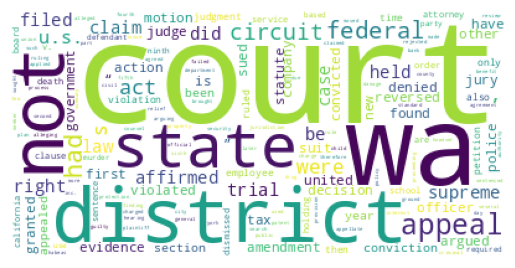

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wc = WordCloud(background_color='white')
cloud = wc.generate_from_frequencies(sorted_dict)
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [ ]:
# 데이터프레임에서 텍스트 컬럼을 가져온다고 가정
text_data = test['facts'].tolist()

lemmatizer = WordNetLemmatizer()

# 텍스트 데이터를 토큰화하고 형태소 분석을 수행
tokenized_texts = [word_tokenize(text.lower()) for text in text_data]
pos_tagged_texts = [pos_tag(tokens) for tokens in tokenized_texts]
lemmatized_texts = [[lemmatizer.lemmatize(token) for token, pos in tagged_tokens
                     if pos.startswith('N') or pos.startswith('V') or pos.startswith('J') or pos.startswith('R')] # N 명사, V 동사, J 형용사, R 부사
                    for tagged_tokens in pos_tagged_texts]

# 단어 개수 세기
word_counts = Counter([word for tokens in lemmatized_texts for word in tokens])
sorted_dict = dict(sorted(word_counts.items(), key=lambda x: x[1], reverse=True))

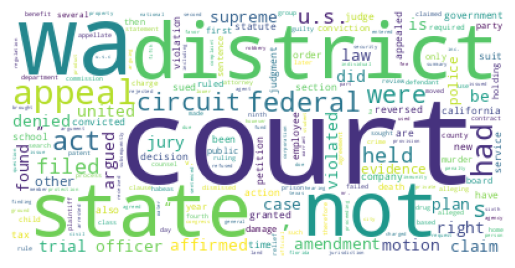

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wc = WordCloud(background_color='white')
cloud = wc.generate_from_frequencies(sorted_dict)
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [ ]:
import spacy

nlp = spacy.load('en_core_web_sm')

# 텍스트 데이터
text_data = train['facts'].tolist()

# 형태소 분석을 수행하는 함수
def lemmatize_text(text):
    doc = nlp(text)
    word_counts = Counter()  # 빈 Counter 객체 생성
    for token in doc:
        if token.pos_ in ['NOUN', 'VERB', 'ADJ', 'ADV'] and not token.is_punct and not token.is_space and not token.text.lower() in ['i', 'you', 'he', 'she', 'it', 'we', 'they']:
            word_counts[token.text.lower()] += 1  # 단어 개수를 누적시킴
    return word_counts

# 텍스트 데이터에 대해 형태소 분석 수행
merged_word_counts = Counter()  # 빈 Counter 객체 생성
for text in text_data:
    word_counts = lemmatize_text(text)
    merged_word_counts += word_counts  # 개별 단어 개수를 합침

# 단어별 개수를 내림차순으로 정렬
sorted_word_counts = dict(sorted(merged_word_counts.items(), key=lambda x: x[1], reverse=True))

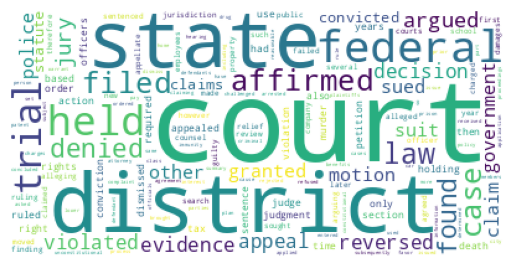

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(background_color='white')
cloud = wc.generate_from_frequencies(sorted_word_counts)
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [ ]:
import spacy

nlp = spacy.load('en_core_web_sm')

# 텍스트 데이터
text_data = test['facts'].tolist()

# 형태소 분석을 수행하는 함수
def lemmatize_text(text):
    doc = nlp(text)
    word_counts = Counter()  # 빈 Counter 객체 생성
    for token in doc:
        if token.pos_ in ['NOUN', 'VERB', 'ADJ', 'ADV'] and not token.is_punct and not token.is_space and not token.text.lower() in ['i', 'you', 'he', 'she', 'it', 'we', 'they']:
            word_counts[token.text.lower()] += 1  # 단어 개수를 누적시킴
    return word_counts

# 텍스트 데이터에 대해 형태소 분석 수행
merged_word_counts = Counter()  # 빈 Counter 객체 생성
for text in text_data:
    word_counts = lemmatize_text(text)
    merged_word_counts += word_counts  # 개별 단어 개수를 합침

# 단어별 개수를 내림차순으로 정렬
sorted_word_counts = dict(sorted(merged_word_counts.items(), key=lambda x: x[1], reverse=True))

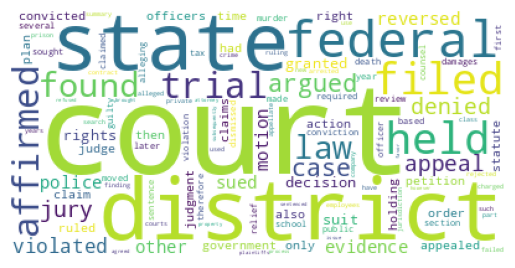

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(background_color='white')
cloud = wc.generate_from_frequencies(sorted_word_counts)
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [ ]:
train['first_party_winner'].value_counts()

1    1649
0     829
Name: first_party_winner, dtype: int64

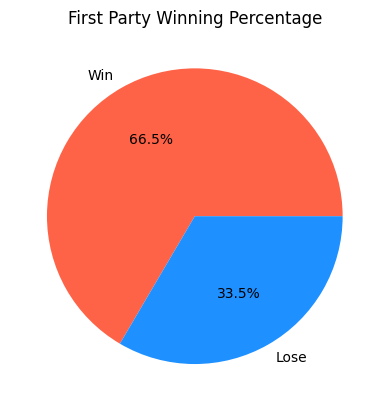

In [ ]:
# 데이터 준비
sizes = train['first_party_winner'].value_counts().values

# 파이 그래프 그리기
plt.pie(sizes, labels=['Win', 'Lose'], autopct='%1.1f%%', colors=['tomato', 'dodgerblue'])

# 그래프 타이틀 설정
plt.title("First Party Winning Percentage")

# 그래프 보이기
plt.show()

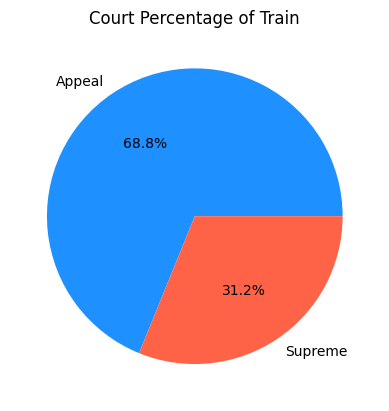

In [ ]:
# 데이터 준비
label = train['court'].value_counts().index
sizes = train['court'].value_counts().values

# 파이 그래프 그리기
plt.pie(sizes, labels=label, autopct='%1.1f%%', colors=['dodgerblue', 'tomato'])

# 그래프 타이틀 설정
plt.title("Court Percentage of Train")

# 그래프 보이기
plt.show()

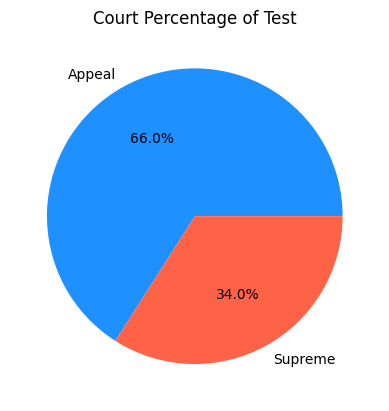

In [ ]:
# 데이터 준비
label = test['court'].value_counts().index
sizes = test['court'].value_counts().values

# 파이 그래프 그리기
plt.pie(sizes, labels=label, autopct='%1.1f%%', colors=['dodgerblue', 'tomato'])

# 그래프 타이틀 설정
plt.title("Court Percentage of Test")

# 그래프 보이기
plt.show()

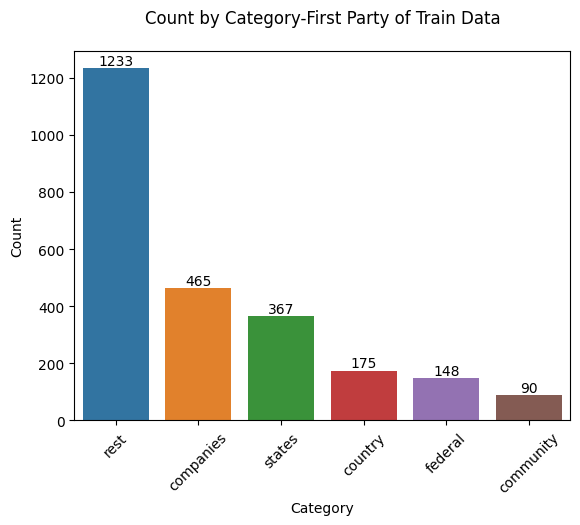

In [ ]:
import seaborn as sns

# 데이터 정렬
sorted_data = train['first_party_cat'].value_counts().sort_values(ascending=False)

# 막대 그래프 그리기
ax = sns.countplot(data=train, x='first_party_cat', order=sorted_data.index)

# 막대 위에 개수 표시
for container in ax.containers:
    ax.bar_label(container)

# 그래프 타이틀 및 축 제목 설정
ax.set_title('Count by Category-First Party of Train Data', pad=20)
plt.xticks(rotation=45)
plt.xlabel('Category')
plt.ylabel('Count')

# 그래프 보이기
plt.show()

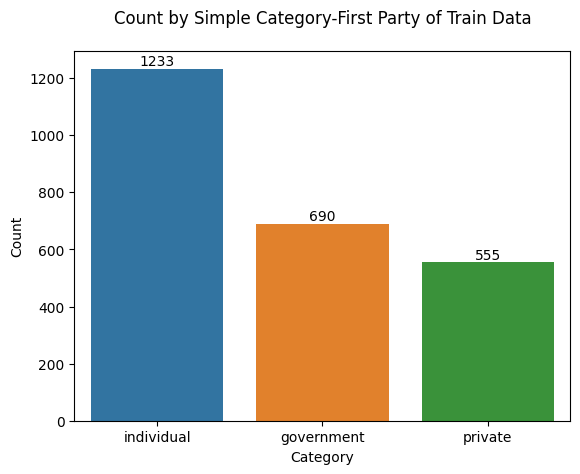

In [ ]:
import seaborn as sns

# 데이터 정렬
sorted_data = train['first_simple_cat'].value_counts().sort_values(ascending=False)

# 막대 그래프 그리기
ax = sns.countplot(data=train, x='first_simple_cat', order=sorted_data.index)

# 막대 위에 개수 표시
for container in ax.containers:
    ax.bar_label(container)

# 그래프 타이틀 및 축 제목 설정
ax.set_title('Count by Simple Category-First Party of Train Data', pad=20)
plt.xlabel('Category')
plt.ylabel('Count')

# 그래프 보이기
plt.show()

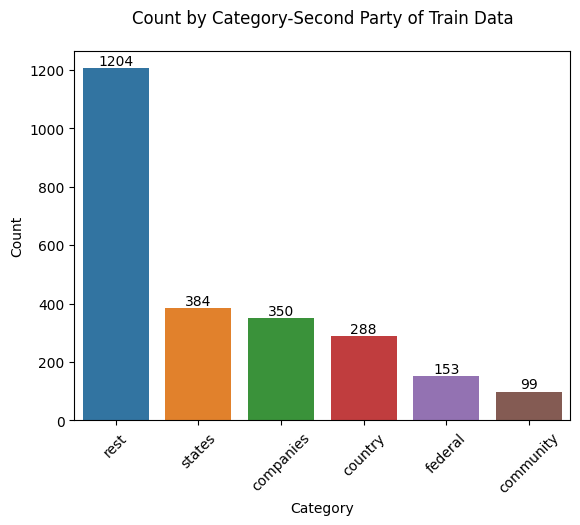

In [ ]:
import seaborn as sns

# 데이터 정렬
sorted_data = train['second_party_cat'].value_counts().sort_values(ascending=False)

# 막대 그래프 그리기
ax = sns.countplot(data=train, x='second_party_cat', order=sorted_data.index)

# 막대 위에 개수 표시
for container in ax.containers:
    ax.bar_label(container)

# 그래프 타이틀 및 축 제목 설정
ax.set_title('Count by Category-Second Party of Train Data', pad=20)
plt.xticks(rotation=45)
plt.xlabel('Category')
plt.ylabel('Count')

# 그래프 보이기
plt.show()

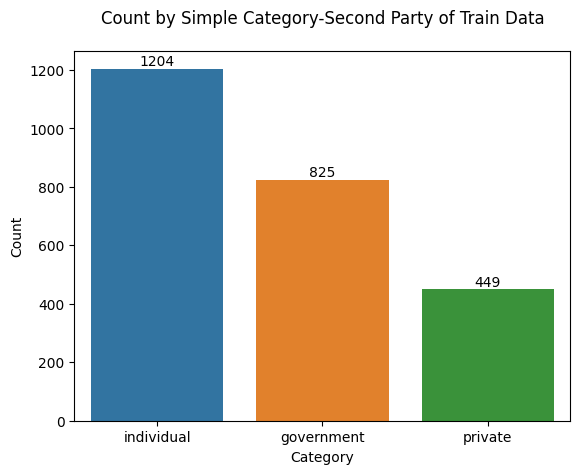

In [ ]:
import seaborn as sns

# 데이터 정렬
sorted_data = train['second_simple_cat'].value_counts().sort_values(ascending=False)

# 막대 그래프 그리기
ax = sns.countplot(data=train, x='second_simple_cat', order=sorted_data.index)

# 막대 위에 개수 표시
for container in ax.containers:
    ax.bar_label(container)

# 그래프 타이틀 및 축 제목 설정
ax.set_title('Count by Simple Category-Second Party of Train Data', pad=20)
plt.xlabel('Category')
plt.ylabel('Count')

# 그래프 보이기
plt.show()

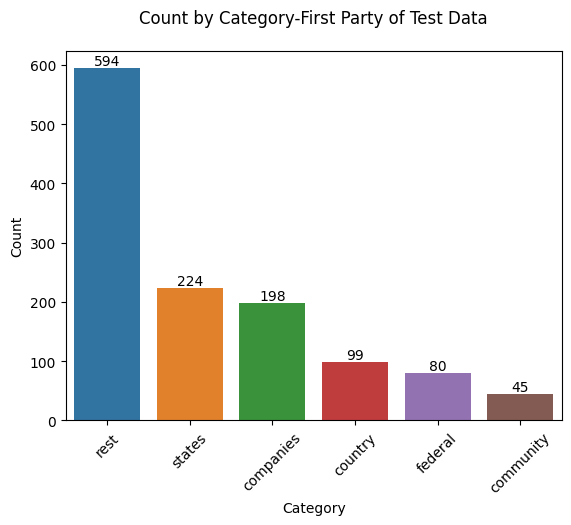

In [ ]:
import seaborn as sns

# 데이터 정렬
sorted_data = test['first_party_cat'].value_counts().sort_values(ascending=False)

# 막대 그래프 그리기
ax = sns.countplot(data=test, x='first_party_cat', order=sorted_data.index)

# 막대 위에 개수 표시
for container in ax.containers:
    ax.bar_label(container)

# 그래프 타이틀 및 축 제목 설정
ax.set_title('Count by Category-First Party of Test Data', pad=20)
plt.xticks(rotation=45)
plt.xlabel('Category')
plt.ylabel('Count')

# 그래프 보이기
plt.show()

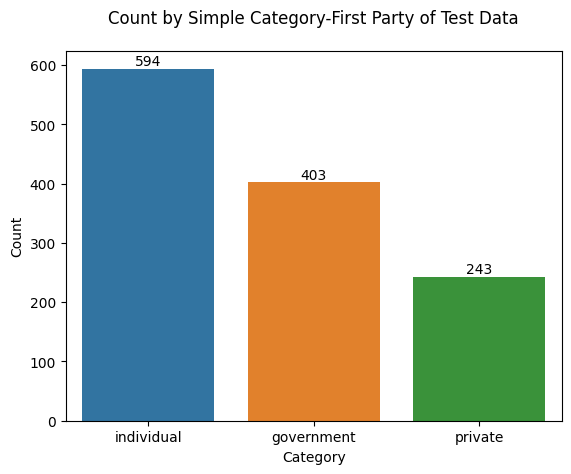

In [ ]:
import seaborn as sns

# 데이터 정렬
sorted_data = test['first_simple_cat'].value_counts().sort_values(ascending=False)

# 막대 그래프 그리기
ax = sns.countplot(data=test, x='first_simple_cat', order=sorted_data.index)

# 막대 위에 개수 표시
for container in ax.containers:
    ax.bar_label(container)

# 그래프 타이틀 및 축 제목 설정
ax.set_title('Count by Simple Category-First Party of Test Data', pad=20)
plt.xlabel('Category')
plt.ylabel('Count')

# 그래프 보이기
plt.show()

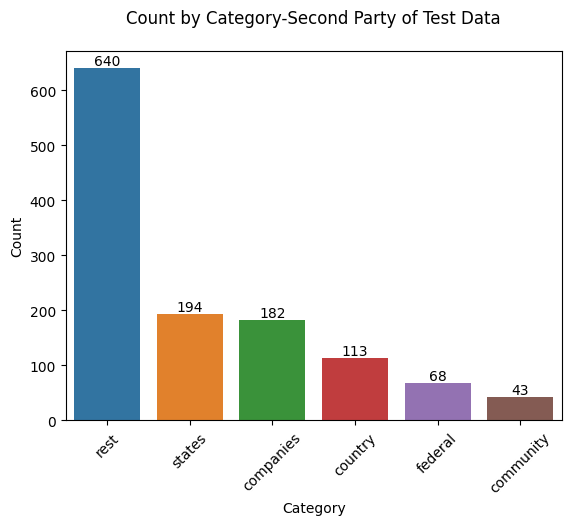

In [ ]:
import seaborn as sns

# 데이터 정렬
sorted_data = test['second_party_cat'].value_counts().sort_values(ascending=False)

# 막대 그래프 그리기
ax = sns.countplot(data=test, x='second_party_cat', order=sorted_data.index)

# 막대 위에 개수 표시
for container in ax.containers:
    ax.bar_label(container)

# 그래프 타이틀 및 축 제목 설정
ax.set_title('Count by Category-Second Party of Test Data', pad=20)
plt.xticks(rotation=45)
plt.xlabel('Category')
plt.ylabel('Count')

# 그래프 보이기
plt.show()

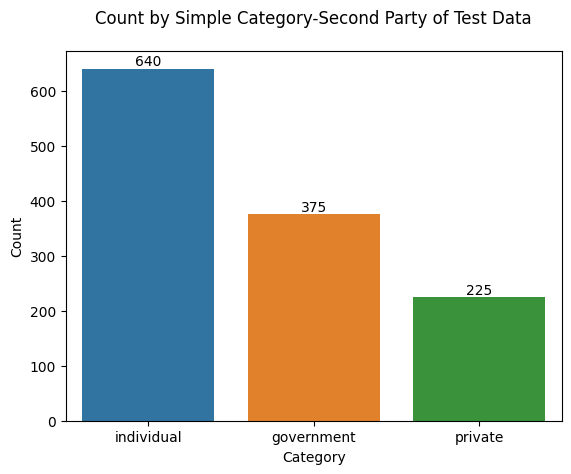

In [ ]:
import seaborn as sns

# 데이터 정렬
sorted_data = test['second_simple_cat'].value_counts().sort_values(ascending=False)

# 막대 그래프 그리기
ax = sns.countplot(data=test, x='second_simple_cat', order=sorted_data.index)

# 막대 위에 개수 표시
for container in ax.containers:
    ax.bar_label(container)

# 그래프 타이틀 및 축 제목 설정
ax.set_title('Count by Simple Category-Second Party of Test Data', pad=20)
plt.xlabel('Category')
plt.ylabel('Count')

# 그래프 보이기
plt.show()

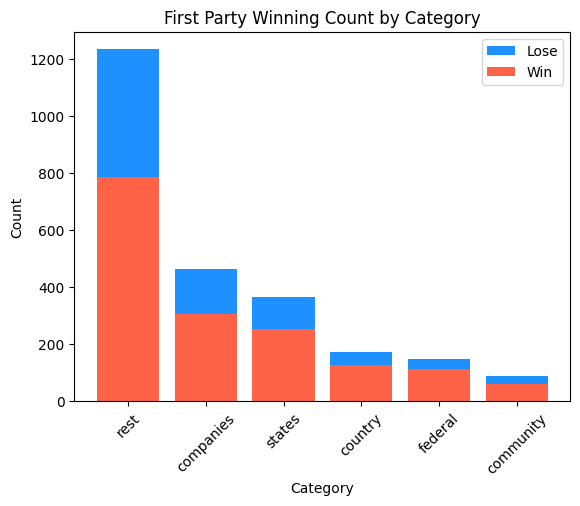

In [ ]:
category_counts = train['first_party_cat'].value_counts()

fig, ax = plt.subplots()

ax.bar(category_counts.index, category_counts, color='dodgerblue', label='Lose')
ax.bar(category_counts.index, train[train['first_party_winner'] == 1]['first_party_cat'].value_counts(), color='tomato', label='Win')

ax.legend()
ax.set_xlabel('Category')
ax.set_ylabel('Count')
ax.set_title('First Party Winning Count by Category')

plt.xticks(rotation=45)
plt.show()

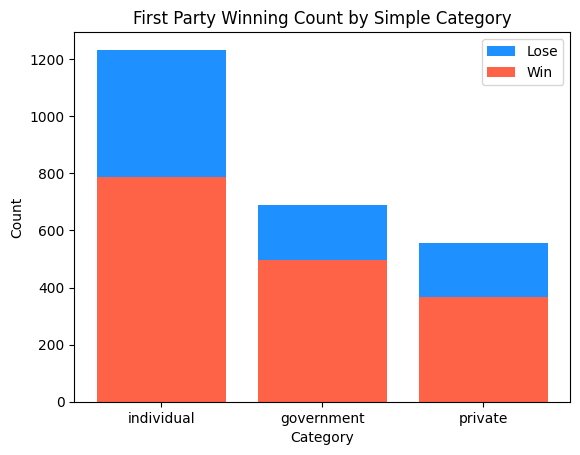

In [ ]:
category_counts = train['first_simple_cat'].value_counts()

fig, ax = plt.subplots()

ax.bar(category_counts.index, category_counts, color='dodgerblue', label='Lose')
ax.bar(category_counts.index, train[train['first_party_winner'] == 1]['first_simple_cat'].value_counts(), color='tomato', label='Win')

ax.legend()
ax.set_xlabel('Category')
ax.set_ylabel('Count')
ax.set_title('First Party Winning Count by Simple Category')

plt.show()

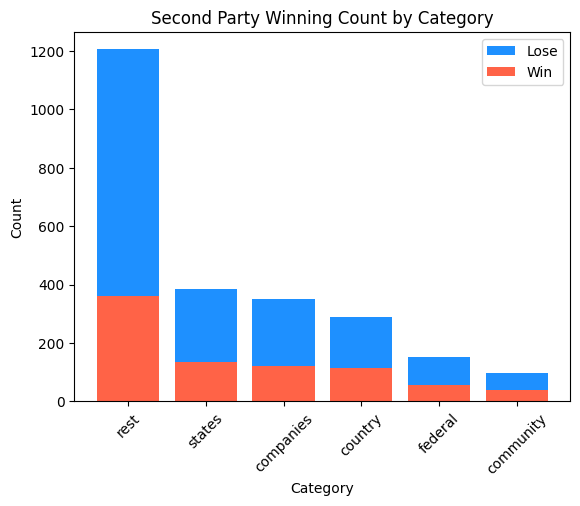

In [ ]:
category_counts = train['second_party_cat'].value_counts()

fig, ax = plt.subplots()

ax.bar(category_counts.index, category_counts, color='dodgerblue', label='Lose')
ax.bar(category_counts.index, train[train['first_party_winner'] == 0]['second_party_cat'].value_counts(), color='tomato', label='Win')

ax.legend()
ax.set_xlabel('Category')
ax.set_ylabel('Count')
ax.set_title('Second Party Winning Count by Category')

plt.xticks(rotation=45)
plt.show()

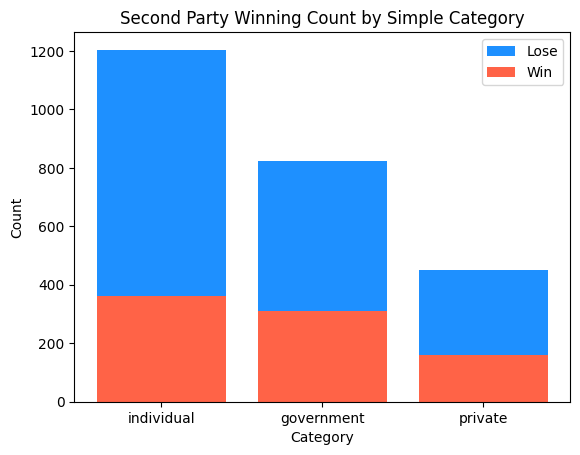

In [ ]:
category_counts = train['second_simple_cat'].value_counts()

fig, ax = plt.subplots()

ax.bar(category_counts.index, category_counts, color='dodgerblue', label='Lose')
ax.bar(category_counts.index, train[train['first_party_winner'] == 0]['second_simple_cat'].value_counts(), color='tomato', label='Win')

ax.legend()
ax.set_xlabel('Category')
ax.set_ylabel('Count')
ax.set_title('Second Party Winning Count by Simple Category')

plt.show()

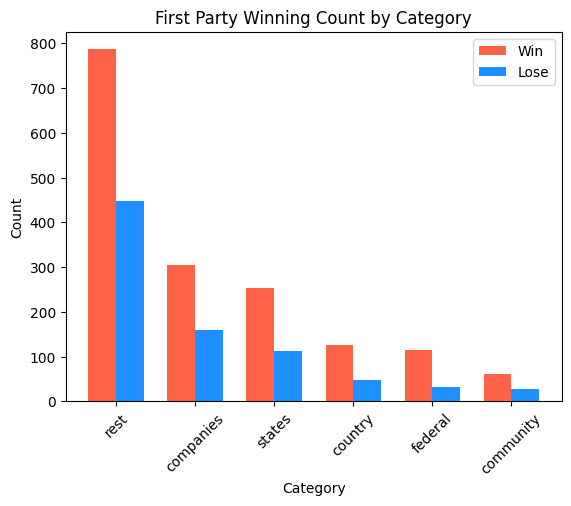

In [ ]:
# 카테고리별 승리 및 패배 개수 계산
category_counts = train['first_party_cat'].value_counts()
win_counts = train[train['first_party_winner'] == 1]['first_party_cat'].value_counts()
lose_counts = train[train['first_party_winner'] == 0]['first_party_cat'].value_counts()

# 막대 그래프 그리기
bar_width = 0.35
r1 = np.arange(len(category_counts))
r2 = [x + bar_width for x in r1]

plt.bar(r1, win_counts, color='tomato', width=bar_width, label='Win')
plt.bar(r2, lose_counts, color='dodgerblue', width=bar_width, label='Lose')

# 축과 레이블 설정
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks([r + bar_width / 2 for r in range(len(category_counts))], category_counts.index, rotation=45)
plt.title('First Party Winning Count by Category')
plt.legend()

plt.show()

In [ ]:
win_counts

rest         786
companies    305
states       254
country      127
federal      115
community     62
Name: first_party_cat, dtype: int64

In [ ]:
lose_counts

rest         447
companies    160
states       113
country       48
federal       33
community     28
Name: first_party_cat, dtype: int64

In [ ]:
train.groupby(['second_party_cat', 'first_party_winner'])[['first_party_winner']].count()

first_party_winner
second_party_cat first_party_winner                    
community        0                                   38
                 1                                   61
companies        0                                  121
                 1                                  229
country          0                                  136
                 1                                  152
federal          0                                   57
                 1                                   96
rest             0                                  361
                 1                                  843
states           0                                  116
                 1                                  268

In [ ]:
train.groupby(['first_party_cat', 'first_party_winner'])[['first_party_winner']].count()

first_party_winner
first_party_cat first_party_winner                    
community       0                                   28
                1                                   62
companies       0                                  160
                1                                  305
country         0                                   48
                1                                  127
federal         0                                   33
                1                                  115
rest            0                                  447
                1                                  786
states          0                                  113
                1                                  254

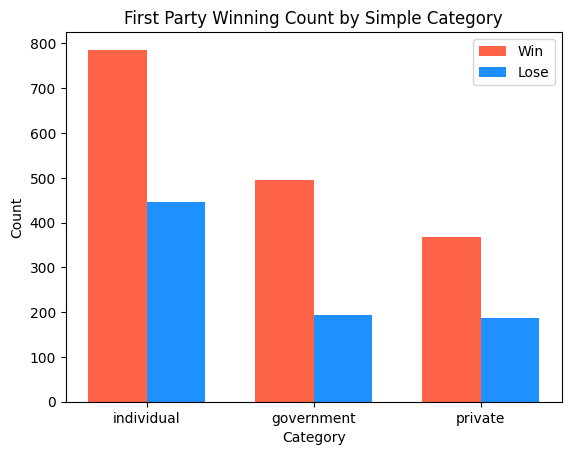

In [ ]:
# 카테고리별 승리 및 패배 개수 계산
category_counts = train['first_simple_cat'].value_counts()
win_counts = train[train['first_party_winner'] == 1]['first_simple_cat'].value_counts()
lose_counts = train[train['first_party_winner'] == 0]['first_simple_cat'].value_counts()

# 막대 그래프 그리기
bar_width = 0.35
r1 = np.arange(len(category_counts))
r2 = [x + bar_width for x in r1]

plt.bar(r1, win_counts, color='tomato', width=bar_width, label='Win')
plt.bar(r2, lose_counts, color='dodgerblue', width=bar_width, label='Lose')

# 축과 레이블 설정
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks([r + bar_width / 2 for r in range(len(category_counts))], category_counts.index)
plt.title('First Party Winning Count by Simple Category')
plt.legend()

plt.show()

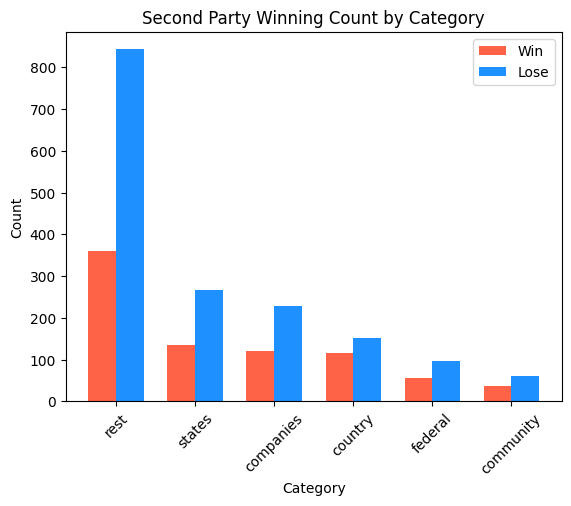

In [ ]:
# 카테고리별 승리 및 패배 개수 계산
category_counts = train['second_party_cat'].value_counts()
win_counts = train[train['first_party_winner'] == 0]['second_party_cat'].value_counts()
lose_counts = train[train['first_party_winner'] == 1]['second_party_cat'].value_counts()

# 막대 그래프 그리기
bar_width = 0.35
r1 = np.arange(len(category_counts))
r2 = [x + bar_width for x in r1]

plt.bar(r1, win_counts, color='tomato', width=bar_width, label='Win')
plt.bar(r2, lose_counts, color='dodgerblue', width=bar_width, label='Lose')

# 축과 레이블 설정
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks([r + bar_width / 2 for r in range(len(category_counts))], category_counts.index, rotation=45)
plt.title('Second Party Winning Count by Category')
plt.legend()

plt.show()

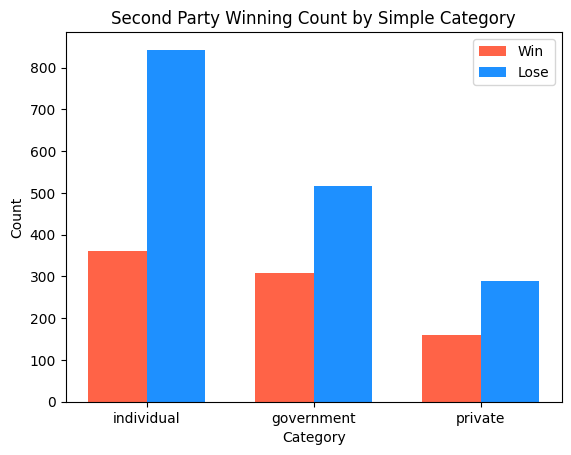

In [ ]:
# 카테고리별 승리 및 패배 개수 계산
category_counts = train['second_simple_cat'].value_counts()
win_counts = train[train['first_party_winner'] == 0]['second_simple_cat'].value_counts()
lose_counts = train[train['first_party_winner'] == 1]['second_simple_cat'].value_counts()

# 막대 그래프 그리기
bar_width = 0.35
r1 = np.arange(len(category_counts))
r2 = [x + bar_width for x in r1]

plt.bar(r1, win_counts, color='tomato', width=bar_width, label='Win')
plt.bar(r2, lose_counts, color='dodgerblue', width=bar_width, label='Lose')

# 축과 레이블 설정
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks([r + bar_width / 2 for r in range(len(category_counts))], category_counts.index)
plt.title('Second Party Winning Count by Simple Category')
plt.legend()

plt.show()

In [ ]:
import matplotlib.pyplot as plt

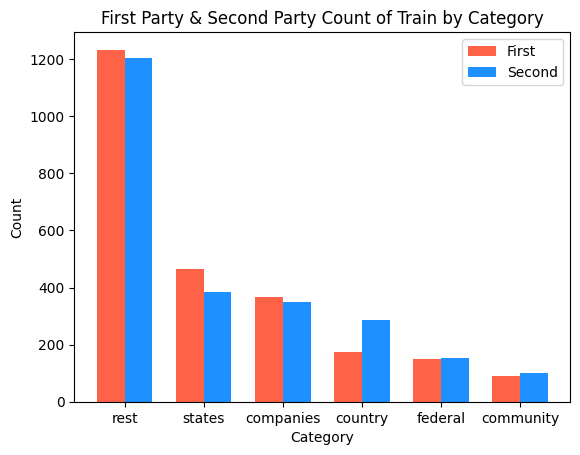

In [ ]:
# 카테고리별 승리 및 패배 개수 계산
category_counts = train['second_party_cat'].value_counts()
first_party_counts = train['first_party_cat'].value_counts()
second_party_counts = train['second_party_cat'].value_counts()

# 막대 그래프 그리기
bar_width = 0.35
r1 = np.arange(len(category_counts))
r2 = [x + bar_width for x in r1]

plt.bar(r1, first_party_counts, color='tomato', width=bar_width, label='First')
plt.bar(r2, second_party_counts, color='dodgerblue', width=bar_width, label='Second')

# 축과 레이블 설정
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks([r + bar_width / 2 for r in range(len(category_counts))], category_counts.index)
plt.title('First Party & Second Party Count of Train by Category')
plt.legend()

plt.show()

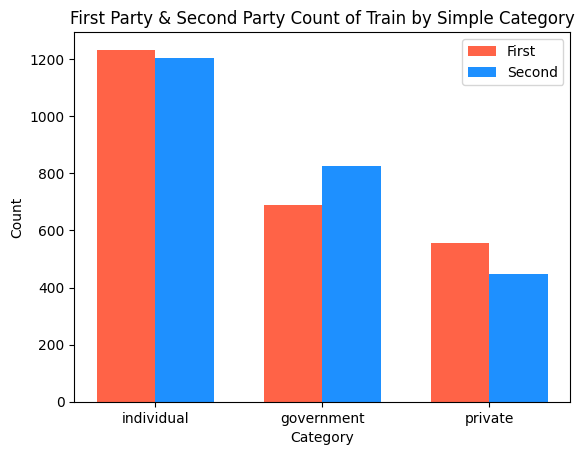

In [ ]:
# 카테고리별 승리 및 패배 개수 계산
category_counts = train['second_simple_cat'].value_counts()
first_party_counts = train['first_simple_cat'].value_counts()
second_party_counts = train['second_simple_cat'].value_counts()

# 막대 그래프 그리기
bar_width = 0.35
r1 = np.arange(len(category_counts))
r2 = [x + bar_width for x in r1]

plt.bar(r1, first_party_counts, color='tomato', width=bar_width, label='First')
plt.bar(r2, second_party_counts, color='dodgerblue', width=bar_width, label='Second')

# 축과 레이블 설정
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks([r + bar_width / 2 for r in range(len(category_counts))], category_counts.index)
plt.title('First Party & Second Party Count of Train by Simple Category')
plt.legend()

plt.show()

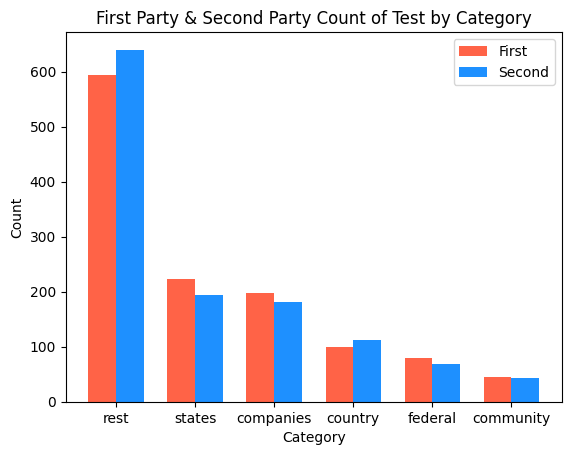

In [ ]:
# 카테고리별 승리 및 패배 개수 계산
category_counts = test['second_party_cat'].value_counts()
first_party_counts = test['first_party_cat'].value_counts()
second_party_counts = test['second_party_cat'].value_counts()

# 막대 그래프 그리기
bar_width = 0.35
r1 = np.arange(len(category_counts))
r2 = [x + bar_width for x in r1]

plt.bar(r1, first_party_counts, color='tomato', width=bar_width, label='First')
plt.bar(r2, second_party_counts, color='dodgerblue', width=bar_width, label='Second')

# 축과 레이블 설정
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks([r + bar_width / 2 for r in range(len(category_counts))], category_counts.index)
plt.title('First Party & Second Party Count of Test by Category')
plt.legend()

plt.show()

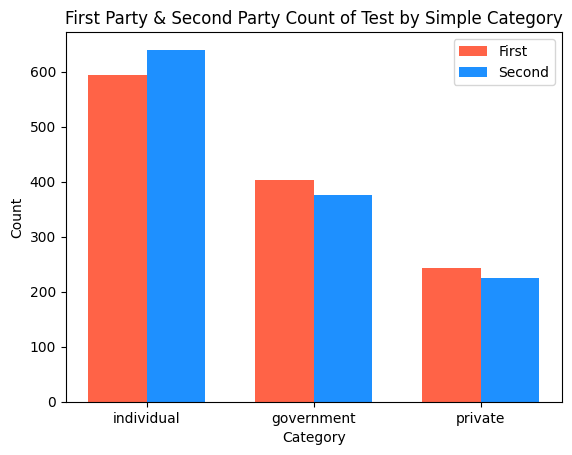

In [ ]:
# 카테고리별 승리 및 패배 개수 계산
category_counts = test['second_simple_cat'].value_counts()
first_party_counts = test['first_simple_cat'].value_counts()
second_party_counts = test['second_simple_cat'].value_counts()

# 막대 그래프 그리기
bar_width = 0.35
r1 = np.arange(len(category_counts))
r2 = [x + bar_width for x in r1]

plt.bar(r1, first_party_counts, color='tomato', width=bar_width, label='First')
plt.bar(r2, second_party_counts, color='dodgerblue', width=bar_width, label='Second')

# 축과 레이블 설정
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks([r + bar_width / 2 for r in range(len(category_counts))], category_counts.index)
plt.title('First Party & Second Party Count of Test by Simple Category')
plt.legend()

plt.show()

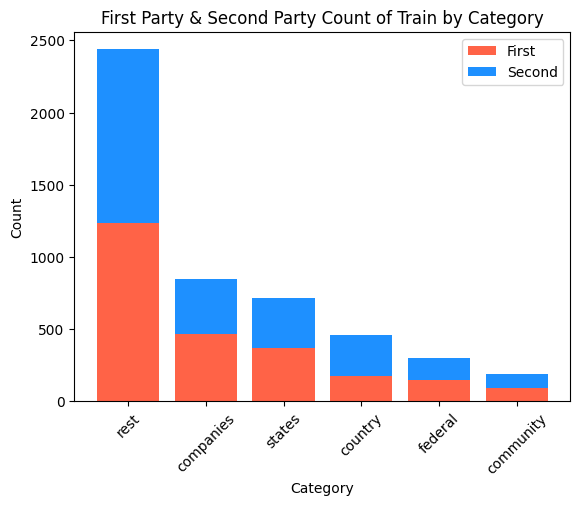

In [ ]:
# 카테고리별 개수 계산
first_party_counts = train['first_party_cat'].value_counts()
second_party_counts = train['second_party_cat'].value_counts()

# 카테고리 리스트와 개수 리스트 생성
categories = first_party_counts.index
first_party_values = first_party_counts.values
second_party_values = second_party_counts.values

# 막대 그래프 그리기
fig, ax = plt.subplots()
ax.bar(categories, first_party_values, color='tomato', label='First')
ax.bar(categories, second_party_values, bottom=first_party_values, color='dodgerblue', label='Second')

ax.legend()
ax.set_xlabel('Category')
ax.set_ylabel('Count')
ax.set_title('First Party & Second Party Count of Train by Category')

plt.xticks(rotation=45)
plt.show()

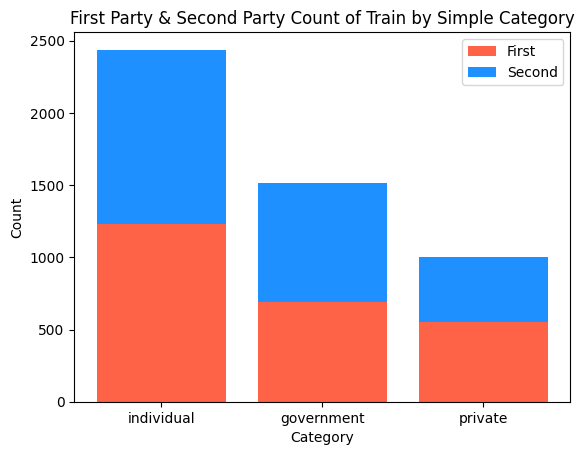

In [ ]:
# 카테고리별 개수 계산
first_party_counts = train['first_simple_cat'].value_counts()
second_party_counts = train['second_simple_cat'].value_counts()

# 카테고리 리스트와 개수 리스트 생성
categories = first_party_counts.index
first_party_values = first_party_counts.values
second_party_values = second_party_counts.values

# 막대 그래프 그리기
fig, ax = plt.subplots()
ax.bar(categories, first_party_values, color='tomato', label='First')
ax.bar(categories, second_party_values, bottom=first_party_values, color='dodgerblue', label='Second')

ax.legend()
ax.set_xlabel('Category')
ax.set_ylabel('Count')
ax.set_title('First Party & Second Party Count of Train by Simple Category')

plt.show()

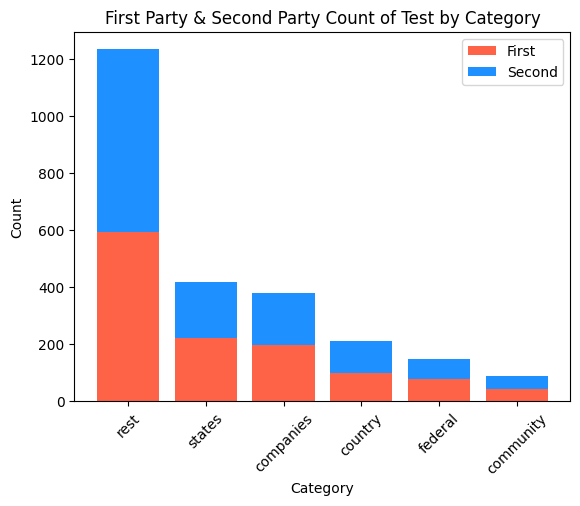

In [ ]:
# 카테고리별 개수 계산
first_party_counts = test['first_party_cat'].value_counts()
second_party_counts = test['second_party_cat'].value_counts()

# 카테고리 리스트와 개수 리스트 생성
categories = first_party_counts.index
first_party_values = first_party_counts.values
second_party_values = second_party_counts.values

# 막대 그래프 그리기
fig, ax = plt.subplots()
ax.bar(categories, first_party_values, color='tomato', label='First')
ax.bar(categories, second_party_values, bottom=first_party_values, color='dodgerblue', label='Second')

ax.legend()
ax.set_xlabel('Category')
ax.set_ylabel('Count')
ax.set_title('First Party & Second Party Count of Test by Category')

plt.xticks(rotation=45)
plt.show()

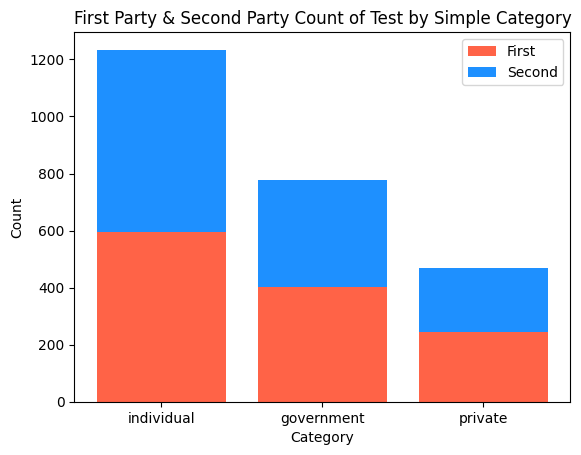

In [ ]:
# 카테고리별 개수 계산
first_party_counts = test['first_simple_cat'].value_counts()
second_party_counts = test['second_simple_cat'].value_counts()

# 카테고리 리스트와 개수 리스트 생성
categories = first_party_counts.index
first_party_values = first_party_counts.values
second_party_values = second_party_counts.values

# 막대 그래프 그리기
fig, ax = plt.subplots()
ax.bar(categories, first_party_values, color='tomato', label='First')
ax.bar(categories, second_party_values, bottom=first_party_values, color='dodgerblue', label='Second')

ax.legend()
ax.set_xlabel('Category')
ax.set_ylabel('Count')
ax.set_title('First Party & Second Party Count of Test by Simple Category')

plt.show()

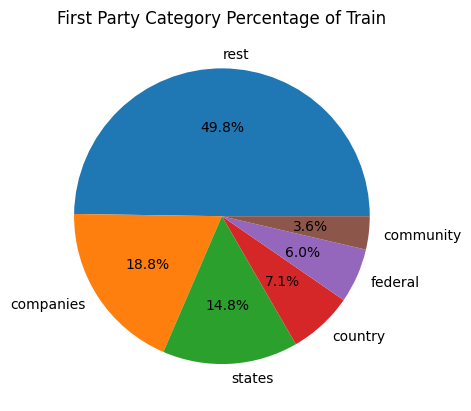

In [ ]:
# 데이터 준비
labels = train['first_party_cat'].value_counts().index
sizes = train['first_party_cat'].value_counts().values

# 파이 그래프 그리기
plt.pie(sizes, labels=labels, autopct='%1.1f%%')

# 그래프 타이틀 설정
plt.title("First Party Category Percentage of Train")

# 그래프 보이기
plt.show()

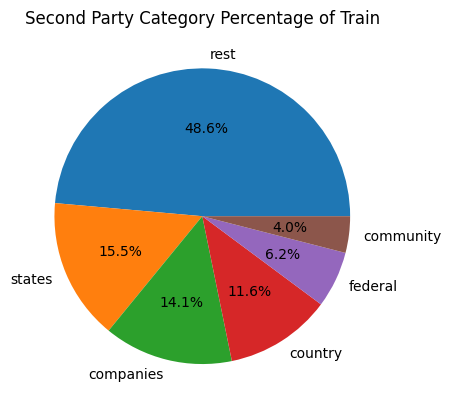

In [ ]:
# 데이터 준비
labels = train['second_party_cat'].value_counts().index
sizes = train['second_party_cat'].value_counts().values

# 파이 그래프 그리기
plt.pie(sizes, labels=labels, autopct='%1.1f%%')

# 그래프 타이틀 설정
plt.title("Second Party Category Percentage of Train")

# 그래프 보이기
plt.show()

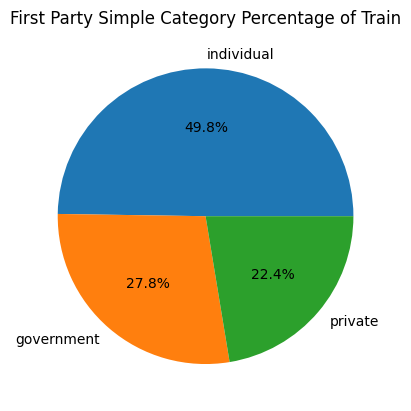

In [ ]:
# 데이터 준비
labels = train['first_simple_cat'].value_counts().index
sizes = train['first_simple_cat'].value_counts().values

# 파이 그래프 그리기
plt.pie(sizes, labels=labels, autopct='%1.1f%%')

# 그래프 타이틀 설정
plt.title("First Party Simple Category Percentage of Train")

# 그래프 보이기
plt.show()

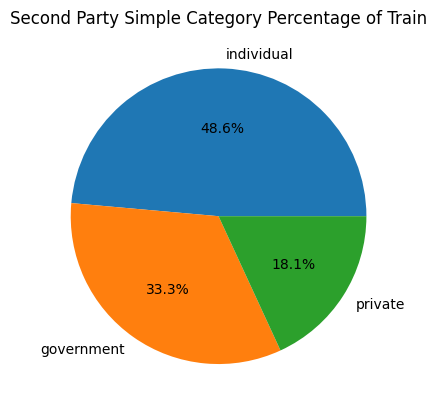

In [ ]:
# 데이터 준비
labels = train['second_simple_cat'].value_counts().index
sizes = train['second_simple_cat'].value_counts().values

# 파이 그래프 그리기
plt.pie(sizes, labels=labels, autopct='%1.1f%%')

# 그래프 타이틀 설정
plt.title("Second Party Simple Category Percentage of Train")

# 그래프 보이기
plt.show()

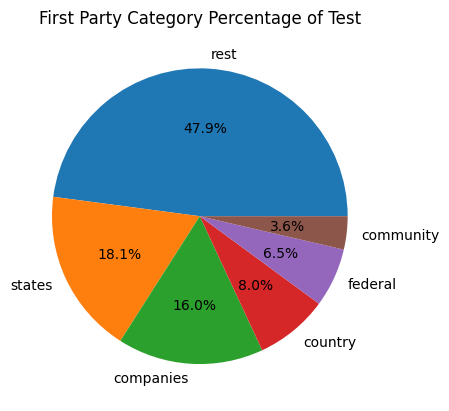

In [ ]:
# 데이터 준비
labels = test['first_party_cat'].value_counts().index
sizes = test['first_party_cat'].value_counts().values

# 파이 그래프 그리기
plt.pie(sizes, labels=labels, autopct='%1.1f%%')

# 그래프 타이틀 설정
plt.title("First Party Category Percentage of Test")

# 그래프 보이기
plt.show()

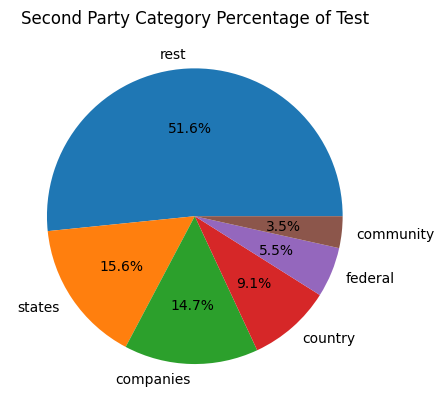

In [ ]:
# 데이터 준비
labels = test['second_party_cat'].value_counts().index
sizes = test['second_party_cat'].value_counts().values

# 파이 그래프 그리기
plt.pie(sizes, labels=labels, autopct='%1.1f%%')

# 그래프 타이틀 설정
plt.title("Second Party Category Percentage of Test")

# 그래프 보이기
plt.show()

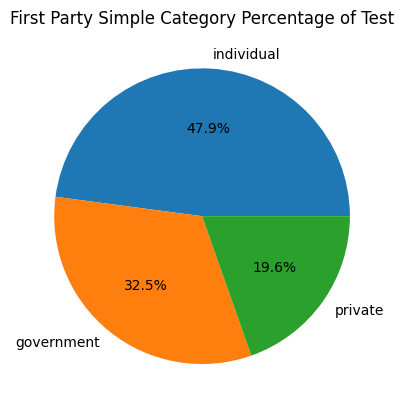

In [ ]:
# 데이터 준비
labels = test['first_simple_cat'].value_counts().index
sizes = test['first_simple_cat'].value_counts().values

# 파이 그래프 그리기
plt.pie(sizes, labels=labels, autopct='%1.1f%%')

# 그래프 타이틀 설정
plt.title("First Party Simple Category Percentage of Test")

# 그래프 보이기
plt.show()

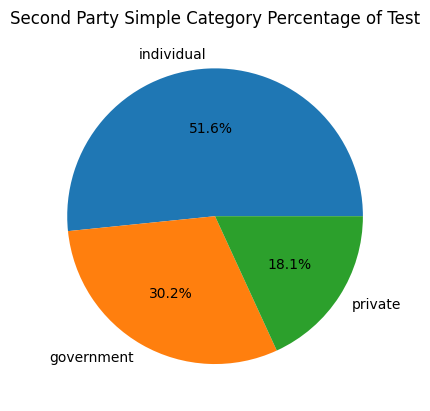

In [ ]:
# 데이터 준비
labels = test['second_simple_cat'].value_counts().index
sizes = test['second_simple_cat'].value_counts().values

# 파이 그래프 그리기
plt.pie(sizes, labels=labels, autopct='%1.1f%%')

# 그래프 타이틀 설정
plt.title("Second Party Simple Category Percentage of Test")

# 그래프 보이기
plt.show()

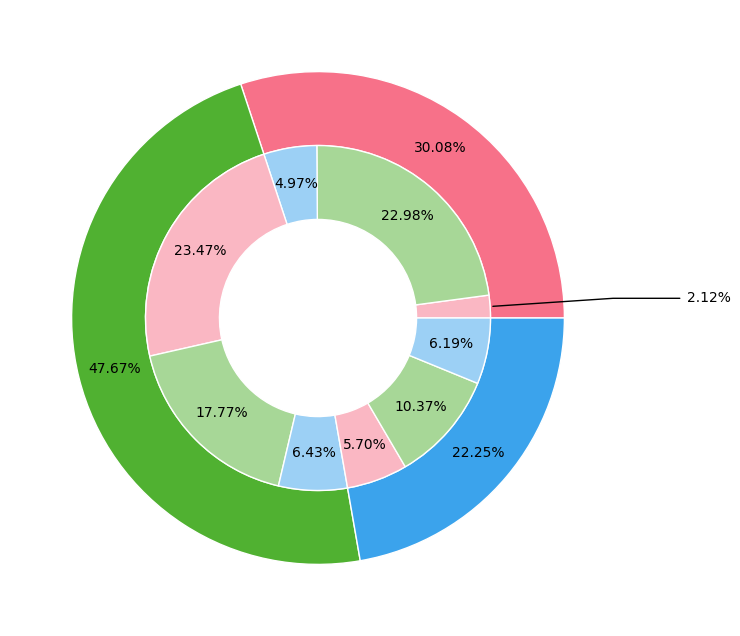

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcl
import matplotlib.patches as mpt
import seaborn as sns
import colorsys

freq_col = 'first_party_winner'  # 빈도수 칼럼
outer_col = 'first_simple_cat'  # 상위 그룹 칼럼
inner_col = 'second_simple_cat'  # 하위 그룹 칼럼

size = 0.3  # 바깥쪽, 안쪽 도넛 조각의 반지름 비율을 0.3으로 한다.
threshold = 4  # 상한선 백분율

color = sns.color_palette('husl', len(train[outer_col].unique()))  # 바깥쪽 도넛의 색상설정

summary = train.groupby(outer_col)[freq_col].sum().reset_index()  # 지역별로 득표수를 집계한다.
outer_data = summary[freq_col]  # 바깥쪽 도넛에 해당하는 데이터
inner_summary = train.groupby([outer_col, inner_col])[freq_col].sum().reset_index()
inner_data = inner_summary[freq_col]  # 안쪽 도넛에 대응하는 데이터

fig = plt.figure(figsize=(8, 8))  # 캔버스 생성
fig.set_facecolor('white')  # 캔버스 배경색을 하얀색으로 설정
ax = fig.add_subplot()  # 프레임 생성

## 바깥쪽 도넛 조각 차트 출력
out_pie = ax.pie(
    outer_data,
    radius=1,
    colors=color,
    wedgeprops=dict(width=size, edgecolor='w')
)

## 바깥쪽 도넛 백분율 텍스트 출력
total = np.sum(outer_data)  # 바깥쪽 빈도수의 총합

sum_pct = 0  # 백분율 초기값

for i in range(len(outer_data)):
    ang1, ang2 = out_pie[0][i].theta1, out_pie[0][i].theta2  # 각1, 각2
    out_r = out_pie[0][i].r  # 원의 반지름

    x = ((2 * out_r - size) / 2) * np.cos(np.pi / 180 * ((ang1 + ang2) / 2))  # 바깥쪽 도넛 조각의 중앙쪽 x좌표
    y = ((2 * out_r - size) / 2) * np.sin(np.pi / 180 * ((ang1 + ang2) / 2))  # 바깥쪽 도넛 조각의 중앙쪽 y좌표

    if i < len(outer_data) - 1:
        sum_pct += float(f'{outer_data[i] / total * 100:.2f}')  # 백분율을 누적한다.
        ax.text(x, y, f'{outer_data[i] / total * 100:.2f}%', ha='center', va='center')  # 백분율 텍스트 표시
    else:  # 총합을 100으로 맞추기 위해 마지막 백분율은 100에서 백분율 누적값을 빼준다.
        ax.text(x, y, f'{100 - sum_pct:.2f}%', ha='center', va='center')

outer_color = []  # 바깥쪽 도넛 조각의 색상을 hsv 컬러로 담을 리스트
for p in out_pie[0]:
    outer_color.append(p.get_facecolor())  # 바깥쪽 도넛 조각을 rgb 컬러로 가져온다.
outer_color_hsv = [mcl.rgb_to_hsv(x[:3]) for x in outer_color]  # rgb를 hsv로 바꾼다.
outer_color_hsv = [(x[0], x[1], 1) for x in outer_color_hsv]  # 색상 채도만 가져오고 명도는 1로 고정한다.

inner_color = sns.color_palette('husl', len(train[outer_col].unique()))

darkened_color = []
alpha = 0.5  # 투명도 값 (0 ~ 1)

for color in inner_color:
    r, g, b = color
    darkened_color.append((r, g, b, alpha))

## 안쪽 도넛 차트 출력
inner_pie = ax.pie(
    inner_summary[freq_col],
    radius=1 - size,
    colors=darkened_color,
    wedgeprops=dict(width=size, edgecolor='w')
)

## 안쪽 도넛 백분율 텍스트 출력
bbox_props = dict(boxstyle='square', fc='w', ec='w', alpha=0)  ## annotation 박스 스타일
config = dict(arrowprops=dict(arrowstyle='-'), bbox=bbox_props, va='center')

inner_sum_pct = 0  ## 안쪽 도넛 백분율 초기값
for i in range(len(inner_data)):
    ang1, ang2 = inner_pie[0][i].theta1, inner_pie[0][i].theta2  ## 안쪽 각1, 안쪽 각2
    r = inner_pie[0][i].r  ## 안쪽 도넛의 반지름

    x = ((2 * r - size) / 2) * np.cos(np.pi / 180 * ((ang1 + ang2) / 2))  ## 안쪽 도넛 조각의 중앙쪽 x좌표
    y = ((2 * r - size) / 2) * np.sin(np.pi / 180 * ((ang1 + ang2) / 2))  ## 안쪽 도넛 조각의 중앙쪽 y좌표

    if i < len(inner_data) - 1:
        inner_sum_pct += float(f'{inner_data[i] / total * 100:.2f}')  ## 백분율을 누적한다.
        text = f'{inner_data[i] / total * 100:.2f}%'  ## 백분율 텍스트 표시
    else:  ## 총합을 100으로 맞추기 위해 마지막 백분율은 100에서 백분율 누적값을 빼준다.
        text = f'{100 - inner_sum_pct:.2f}%'

    ## 비율 상한선보다 작은 것들은 Annotation으로 만든다.
    if inner_data[i] / total * 100 < threshold:
        ang = (ang1 + ang2) / 2  ## 중심각
        x = out_r * np.cos(np.deg2rad(ang))  ## Annotation의 끝점에 해당하는 x좌표
        y = out_r * np.sin(np.deg2rad(ang))  ## Annotation의 끝점에 해당하는 y좌표

        ## x좌표가 양수이면 즉 y축을 중심으로 오른쪽에 있으면 왼쪽 정렬
        ## x좌표가 음수이면 즉 y축을 중심으로 왼쪽에 있으면 오른쪽 정렬
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = "angle,angleA=0,angleB={}".format(ang)  ## 시작점과 끝점 연결 스타일
        config["arrowprops"].update({"connectionstyle": connectionstyle})  ##
        ax.annotate(
            text,
            xy=((out_r - size) * x, (out_r - size) * y),
            xytext=(1.5 * x, 1.2 * y),
            horizontalalignment=horizontalalignment,
            **config
        )
    else:
        x = ((2 * r - size) / 2) * np.cos(np.pi / 180 * ((ang1 + ang2) / 2))  ## 텍스트 x좌표
        y = ((2 * r - size) / 2) * np.sin(np.pi / 180 * ((ang1 + ang2) / 2))  ## 텍스트 y좌표
        ax.text(x, y, text, ha='center', va='center')

plt.show()

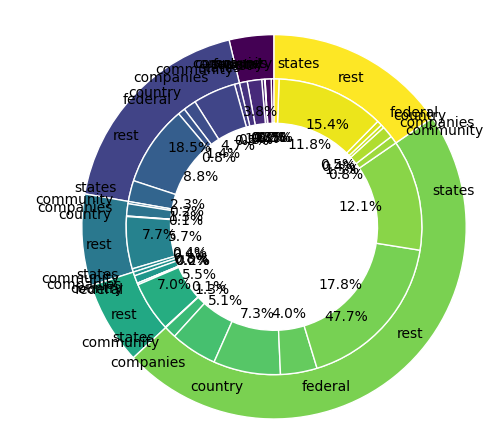

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

group_outer = train.groupby('first_party_cat')['first_party_winner'].sum()
group_inner = train.groupby(['first_party_cat', 'second_party_cat'])['first_party_winner'].sum()

colors_outer = plt.cm.viridis(np.linspace(0, 1, len(group_outer.index)))
colors_inner = plt.cm.viridis(np.linspace(0, 1, len(group_inner.index)))

fig, ax = plt.subplots()

wedges, texts, autotexts = ax.pie(group_outer, radius=1.3, labels=group_outer.index, colors=colors_outer,
                     wedgeprops=dict(width=0.3, edgecolor='white'), startangle=90, autopct='%1.1f%%')

for text in texts:
    text.set_color('white')

ax.pie(group_inner, radius=1.0, labels=group_inner.index.get_level_values('second_party_cat'),
       colors=colors_inner, wedgeprops=dict(width=0.3, edgecolor='white'), startangle=90, autopct='%1.1f%%')

plt.show()

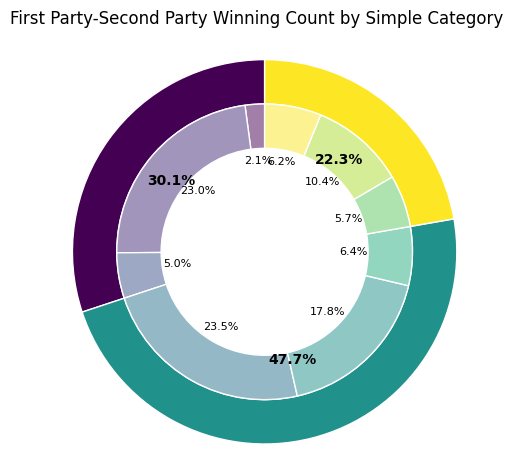

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

group_outer = train.groupby('first_simple_cat')['first_party_winner'].sum()
group_inner = train.groupby(['first_simple_cat', 'second_simple_cat'])['first_party_winner'].sum()

colors_outer = plt.cm.viridis(np.linspace(0, 1, len(group_outer.index)))
colors_inner = plt.cm.viridis(np.linspace(0, 1, len(group_inner.index)))

fig, ax = plt.subplots()

wedges, texts, autotexts = ax.pie(group_outer, radius=1.3, colors=colors_outer,
                     wedgeprops=dict(width=0.3, edgecolor='white'), startangle=90, autopct='%1.1f%%')

for text in texts:
    text.set_color('white')

# 색상의 alpha 값을 조정하여 범위를 맞추기
colors_inner_with_alpha = [(*color[:3], 0.5) for color in colors_inner]

wedges_in, texts_in, autotexts_in = ax.pie(group_inner, radius=1.0, colors=colors_inner_with_alpha,
                                          wedgeprops=dict(width=0.3, edgecolor='white'), startangle=90, autopct='%1.1f%%')

# 숫자를 가운데로 배치하기 위한 설정
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(10)
    autotext.set_horizontalalignment('center')
    autotext.set_verticalalignment('baseline')

for autotext in autotexts_in:
    autotext.set_color('black')
    autotext.set_fontsize(8)
    autotext.set_horizontalalignment('center')
    autotext.set_verticalalignment('baseline')

fig.suptitle('First Party-Second Party Winning Count by Simple Category', y = 1)
plt.show()

In [ ]:
result = pd.read_csv('/content/result_cat.csv')
result.head()

,first_party,second_party,facts,first_party_cat,second_party_cat,first_party_winner
0,Salerno,United States,The 1984 Bail Reform Act allowed the federal c...,rest,country,0
1,Milberg Weiss Bershad Hynes and Lerach,"Lexecon, Inc.",Lexecon Inc. was a defendant in a class action...,rest,companies,0
2,No. 07-582\t Title: \t Federal Communications ...,"Fox Television Stations, Inc., et al.","In 2002 and 2003, Fox Television Stations broa...",federal,companies,0
3,Harold Kaufman,United States,During his trial for armed robbery of a federa...,rest,country,1
4,Berger,Hanlon,"In 1993, a magistrate judge issued a warrant a...",rest,rest,1


In [ ]:
result['first_simple_cat'] = 'init'

result.loc[((result['first_party_cat'] == 'states') | (result['first_party_cat'] == 'country') | (result['first_party_cat'] == 'federal')), 'first_simple_cat'] = 'government'
result.loc[((result['first_party_cat'] == 'companies') | (result['first_party_cat'] == 'community')), 'first_simple_cat'] = 'private'
result.loc[(result['first_party_cat'] == 'rest'), 'first_simple_cat'] = 'individual'


result['second_simple_cat'] = 'init'

result.loc[((result['second_party_cat'] == 'states') | (result['second_party_cat'] == 'country') | (result['second_party_cat'] == 'federal')), 'second_simple_cat'] = 'government'
result.loc[((result['second_party_cat'] == 'companies') | (result['second_party_cat'] == 'community')), 'second_simple_cat'] = 'private'
result.loc[(result['second_party_cat'] == 'rest'), 'second_simple_cat'] = 'individual'

result.head()

,first_party,second_party,facts,first_party_cat,second_party_cat,first_party_winner,first_simple_cat,second_simple_cat
0,Salerno,United States,The 1984 Bail Reform Act allowed the federal c...,rest,country,0,individual,government
1,Milberg Weiss Bershad Hynes and Lerach,"Lexecon, Inc.",Lexecon Inc. was a defendant in a class action...,rest,companies,0,individual,private
2,No. 07-582\t Title: \t Federal Communications ...,"Fox Television Stations, Inc., et al.","In 2002 and 2003, Fox Television Stations broa...",federal,companies,0,government,private
3,Harold Kaufman,United States,During his trial for armed robbery of a federa...,rest,country,1,individual,government
4,Berger,Hanlon,"In 1993, a magistrate judge issued a warrant a...",rest,rest,1,individual,individual


In [ ]:
result['first_simple_cat'].value_counts(), result['second_simple_cat'].value_counts()

(individual    594
 government    403
 private       243
 Name: first_simple_cat, dtype: int64,
 individual    640
 government    375
 private       225
 Name: second_simple_cat, dtype: int64)

In [ ]:
result.groupby(['first_simple_cat', 'second_simple_cat'])[['first_party_winner']].sum()

first_party_winner
first_simple_cat second_simple_cat                    
government       government                         11
                 individual                        180
                 private                            38
individual       government                        162
                 individual                        122
                 private                            56
private          government                         29
                 individual                         62
                 private                            35

In [ ]:
result['first_party_winner'].value_counts()

1    695
0    545
Name: first_party_winner, dtype: int64

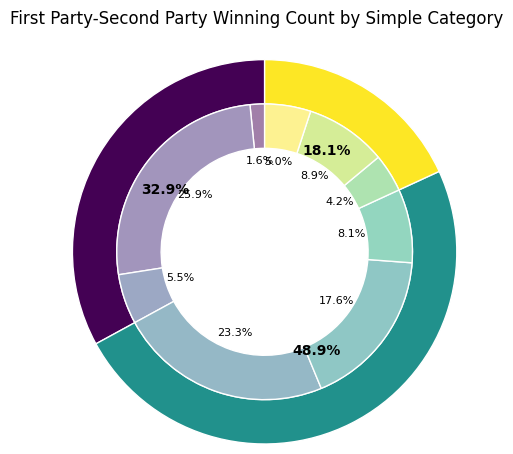

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

group_outer = result.groupby('first_simple_cat')['first_party_winner'].sum()
group_inner = result.groupby(['first_simple_cat', 'second_simple_cat'])['first_party_winner'].sum()

colors_outer = plt.cm.viridis(np.linspace(0, 1, len(group_outer.index)))
colors_inner = plt.cm.viridis(np.linspace(0, 1, len(group_inner.index)))

fig, ax = plt.subplots()

wedges, texts, autotexts = ax.pie(group_outer, radius=1.3, colors=colors_outer,
                     wedgeprops=dict(width=0.3, edgecolor='white'), startangle=90, autopct='%1.1f%%')

for text in texts:
    text.set_color('white')

# 색상의 alpha 값을 조정하여 범위를 맞추기
colors_inner_with_alpha = [(*color[:3], 0.5) for color in colors_inner]

wedges_in, texts_in, autotexts_in = ax.pie(group_inner, radius=1.0, colors=colors_inner_with_alpha,
                                          wedgeprops=dict(width=0.3, edgecolor='white'), startangle=90, autopct='%1.1f%%')

# 숫자를 가운데로 배치하기 위한 설정
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(10)
    autotext.set_horizontalalignment('center')
    autotext.set_verticalalignment('baseline')

for autotext in autotexts_in:
    autotext.set_color('black')
    autotext.set_fontsize(8)
    autotext.set_horizontalalignment('center')
    autotext.set_verticalalignment('baseline')

fig.suptitle('First Party-Second Party Winning Count by Simple Category', y = 1)
plt.show()

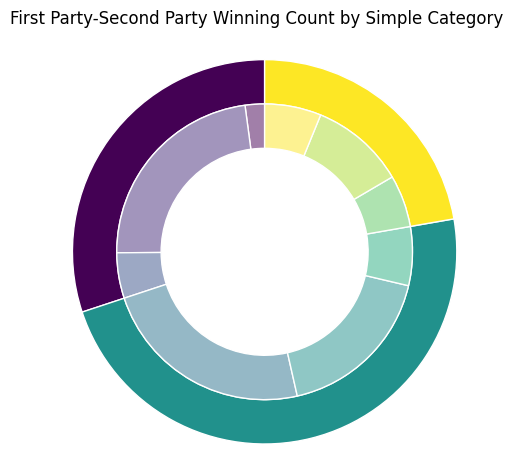

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

group_outer = train.groupby('first_simple_cat')['first_party_winner'].sum()
group_inner = train.groupby(['first_simple_cat', 'second_simple_cat'])['first_party_winner'].sum()

colors_outer = plt.cm.viridis(np.linspace(0, 1, len(group_outer.index)))
colors_inner = plt.cm.viridis(np.linspace(0, 1, len(group_inner.index)))

fig, ax = plt.subplots()

wedges, texts = ax.pie(group_outer, radius=1.3, colors=colors_outer,
                     wedgeprops=dict(width=0.3, edgecolor='white'), startangle=90)

for text in texts:
    text.set_color('white')

# 색상의 alpha 값을 조정하여 범위를 맞추기
colors_inner_with_alpha = [(*color[:3], 0.5) for color in colors_inner]

wedges_in, texts_in = ax.pie(group_inner, radius=1.0, colors=colors_inner_with_alpha,
                                          wedgeprops=dict(width=0.3, edgecolor='white'), startangle=90)

fig.suptitle('First Party-Second Party Winning Count by Simple Category', y = 1)
plt.show()

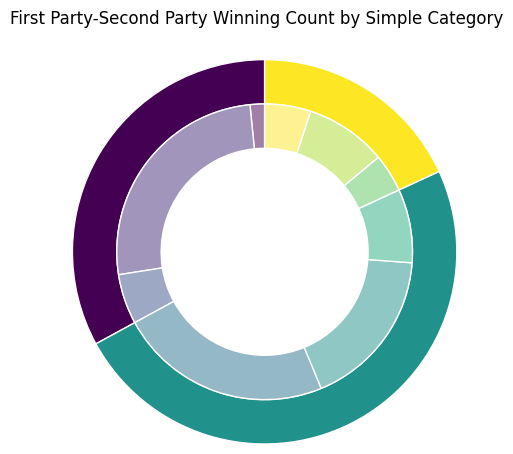

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

group_outer = result.groupby('first_simple_cat')['first_party_winner'].sum()
group_inner = result.groupby(['first_simple_cat', 'second_simple_cat'])['first_party_winner'].sum()

colors_outer = plt.cm.viridis(np.linspace(0, 1, len(group_outer.index)))
colors_inner = plt.cm.viridis(np.linspace(0, 1, len(group_inner.index)))

fig, ax = plt.subplots()

wedges, texts = ax.pie(group_outer, radius=1.3, colors=colors_outer,
                     wedgeprops=dict(width=0.3, edgecolor='white'), startangle=90)

for text in texts:
    text.set_color('white')

# 색상의 alpha 값을 조정하여 범위를 맞추기
colors_inner_with_alpha = [(*color[:3], 0.5) for color in colors_inner]

wedges_in, texts_in = ax.pie(group_inner, radius=1.0, colors=colors_inner_with_alpha,
                                          wedgeprops=dict(width=0.3, edgecolor='white'), startangle=90)

fig.suptitle('First Party-Second Party Winning Count by Simple Category', y = 1)
plt.show()

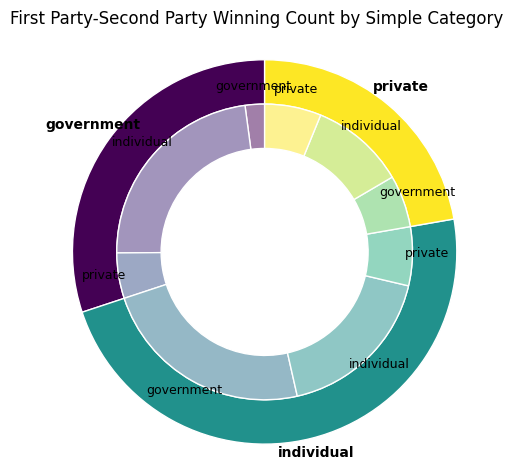

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

group_outer = train.groupby('first_simple_cat')['first_party_winner'].sum()
group_inner = train.groupby(['first_simple_cat', 'second_simple_cat'])['first_party_winner'].sum()

colors_outer = plt.cm.viridis(np.linspace(0, 1, len(group_outer.index)))
colors_inner = plt.cm.viridis(np.linspace(0, 1, len(group_inner.index)))

fig, ax = plt.subplots()

wedges, texts = ax.pie(group_outer, radius=1.3, colors=colors_outer, labels=group_outer.index,
                     wedgeprops=dict(width=0.3, edgecolor='white'), startangle=90)

for text in texts:
    text.set_color('white')

# 색상의 alpha 값을 조정하여 범위를 맞추기
colors_inner_with_alpha = [(*color[:3], 0.5) for color in colors_inner]

wedges_in, texts_in = ax.pie(group_inner, radius=1.0, colors=colors_inner_with_alpha,
                                           labels=group_inner.index.get_level_values('second_simple_cat'),
                                          wedgeprops=dict(width=0.3, edgecolor='white'), startangle=90)

# 숫자를 가운데로 배치하기 위한 설정
for text in texts:
    text.set_color('black')
    text.set_fontweight('bold')
    text.set_fontsize(10)
    text.set_horizontalalignment('center')
    text.set_verticalalignment('baseline')

for text in texts_in:
    text.set_color('black')
    text.set_fontsize(9)
    text.set_horizontalalignment('center')
    text.set_verticalalignment('baseline')

fig.suptitle('First Party-Second Party Winning Count by Simple Category', y = 1)
plt.show()

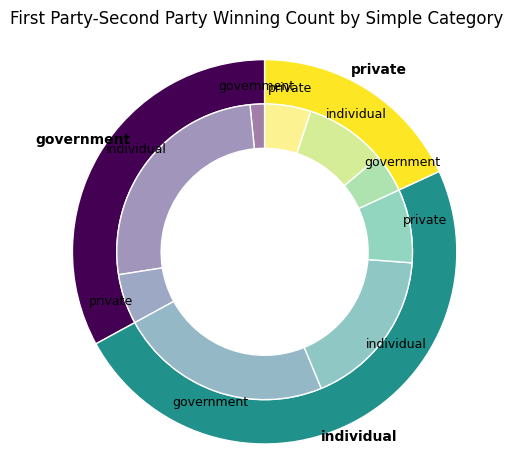

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

group_outer = result.groupby('first_simple_cat')['first_party_winner'].sum()
group_inner = result.groupby(['first_simple_cat', 'second_simple_cat'])['first_party_winner'].sum()

colors_outer = plt.cm.viridis(np.linspace(0, 1, len(group_outer.index)))
colors_inner = plt.cm.viridis(np.linspace(0, 1, len(group_inner.index)))

fig, ax = plt.subplots()

wedges, texts = ax.pie(group_outer, radius=1.3, colors=colors_outer, labels=group_outer.index,
                     wedgeprops=dict(width=0.3, edgecolor='white'), startangle=90)

for text in texts:
    text.set_color('white')

# 색상의 alpha 값을 조정하여 범위를 맞추기
colors_inner_with_alpha = [(*color[:3], 0.5) for color in colors_inner]

wedges_in, texts_in = ax.pie(group_inner, radius=1.0, colors=colors_inner_with_alpha,
                                           labels=group_inner.index.get_level_values('second_simple_cat'),
                                          wedgeprops=dict(width=0.3, edgecolor='white'), startangle=90)

# 숫자를 가운데로 배치하기 위한 설정
for text in texts:
    text.set_color('black')
    text.set_fontweight('bold')
    text.set_fontsize(10)
    text.set_horizontalalignment('center')
    text.set_verticalalignment('baseline')

for text in texts_in:
    text.set_color('black')
    text.set_fontsize(9)
    text.set_horizontalalignment('center')
    text.set_verticalalignment('baseline')

fig.suptitle('First Party-Second Party Winning Count by Simple Category', y = 1)
plt.show()

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 7.8 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier
categorical_features = ['first_party_cat', 'second_party_cat', 'court']

In [ ]:
model = CatBoostClassifier(cat_features=categorical_features)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer = TfidfVectorizer()
def get_vector(vectorizer, df, train_mode):
    if train_mode:
        X_facts = vectorizer.fit_transform(df['facts'])
    else:
        X_facts = vectorizer.transform(df['facts'])
    X_party1 = vectorizer.transform(df['first_party_cat'])
    X_party2 = vectorizer.transform(df['second_party_cat'])

    X = np.concatenate([X_party1.todense(), X_party2.todense(), X_facts.todense()], axis=1)
    return X

In [ ]:
train = pd.read_csv('/content/df_court_train.csv')
test = pd.read_csv('/content/df_court_test.csv')
train.head()

,first_party,second_party,facts,first_party_winner,first_party_cat,second_party_cat,court
0,Phil A. St. Amant,Herman A. Thompson,"On June 27, 1962, Phil St. Amant, a candidate ...",1,rest,rest,Supreme
1,Stephen Duncan,Lawrence Owens,Ramon Nelson was riding his bike when he suffe...,0,rest,rest,Appeal
2,Billy Joe Magwood,"Tony Patterson, Warden, et al.",An Alabama state court convicted Billy Joe Mag...,1,rest,rest,Appeal
3,Linkletter,Walker,Victor Linkletter was convicted in state court...,0,rest,rest,Supreme
4,William Earl Fikes,Alabama,"On April 24, 1953 in Selma, Alabama, an intrud...",1,rest,states,Supreme


In [ ]:
train_part = train.iloc[:, 4:]
test_part = test.iloc[:, 3:]

In [ ]:
X_train = get_vector(vectorizer, train, True)
Y_train = train["first_party_winner"]
X_test = get_vector(vectorizer, test, False)

In [ ]:
model.fit(train_part, Y_train)
y_pred = model.predict(test_part)

Learning rate set to 0.015178
0:	learn: 0.6914121	total: 55.4ms	remaining: 55.3s
1:	learn: 0.6897304	total: 62.2ms	remaining: 31s
2:	learn: 0.6881004	total: 66.5ms	remaining: 22.1s
3:	learn: 0.6865205	total: 72.2ms	remaining: 18s
4:	learn: 0.6849893	total: 76.8ms	remaining: 15.3s
5:	learn: 0.6835052	total: 86.8ms	remaining: 14.4s
6:	learn: 0.6820668	total: 89.5ms	remaining: 12.7s
7:	learn: 0.6806727	total: 91.7ms	remaining: 11.4s
8:	learn: 0.6793216	total: 94.4ms	remaining: 10.4s
9:	learn: 0.6780120	total: 96.4ms	remaining: 9.55s
10:	learn: 0.6767428	total: 98.6ms	remaining: 8.86s
11:	learn: 0.6755127	total: 109ms	remaining: 8.97s
12:	learn: 0.6743206	total: 111ms	remaining: 8.43s
13:	learn: 0.6731651	total: 113ms	remaining: 7.97s
14:	learn: 0.6720453	total: 115ms	remaining: 7.57s
15:	learn: 0.6709600	total: 123ms	remaining: 7.57s
16:	learn: 0.6699081	total: 125ms	remaining: 7.24s
17:	learn: 0.6688887	total: 127ms	remaining: 6.94s
18:	learn: 0.6677916	total: 138ms	remaining: 7.13s
19:	

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
scores = cross_val_score(model, train_part, Y_train, cv=5, scoring='accuracy')

# 교차 검증 결과 출력
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
6:	learn: 0.6829613	total: 36.5ms	remaining: 5.18s
7:	learn: 0.6814459	total: 47.1ms	remaining: 5.83s
8:	learn: 0.6799943	total: 54.2ms	remaining: 5.97s
9:	learn: 0.6786780	total: 63.9ms	remaining: 6.33s
10:	learn: 0.6772299	total: 75.2ms	remaining: 6.76s
11:	learn: 0.6758784	total: 84.3ms	remaining: 6.94s
12:	learn: 0.6746303	total: 100ms	remaining: 7.59s
13:	learn: 0.6735147	total: 106ms	remaining: 7.5s
14:	learn: 0.6722773	total: 115ms	remaining: 7.57s
15:	learn: 0.6710681	total: 122ms	remaining: 7.49s
16:	learn: 0.6700233	total: 126ms	remaining: 7.29s
17:	learn: 0.6690613	total: 137ms	remaining: 7.48s
18:	learn: 0.6679233	total: 143ms	remaining: 7.38s
19:	learn: 0.6670027	total: 145ms	remaining: 7.12s
20:	learn: 0.6661226	total: 149ms	remaining: 6.93s
21:	learn: 0.6652671	total: 153ms	remaining: 6.8s
22:	learn: 0.6641548	total: 165ms	remaining: 7.01s
23:	learn: 0.6633469	total: 167ms	remaining: 6.8s
24:	learn: 0.6623300	total: 177ms	remaining: 6.

In [ ]:
train = pd.read_csv('/content/train_simple_cat.csv')
train.head()

,first_party,second_party,facts,first_party_winner,first_party_cat,second_party_cat,court,first_simple_cat,second_simple_cat
0,Phil A. St. Amant,Herman A. Thompson,"On June 27, 1962, Phil St. Amant, a candidate ...",1,rest,rest,Supreme,individual,individual
1,Stephen Duncan,Lawrence Owens,Ramon Nelson was riding his bike when he suffe...,0,rest,rest,Appeal,individual,individual
2,Billy Joe Magwood,"Tony Patterson, Warden, et al.",An Alabama state court convicted Billy Joe Mag...,1,rest,rest,Appeal,individual,individual
3,Linkletter,Walker,Victor Linkletter was convicted in state court...,0,rest,rest,Supreme,individual,individual
4,William Earl Fikes,Alabama,"On April 24, 1953 in Selma, Alabama, an intrud...",1,rest,states,Supreme,individual,government


In [ ]:
test = pd.read_csv('/content/test_simple_cat.csv')
test.head()

,first_party,second_party,facts,first_party_cat,second_party_cat,court,first_simple_cat,second_simple_cat
0,Salerno,United States,The 1984 Bail Reform Act allowed the federal c...,rest,country,Appeal,individual,government
1,Milberg Weiss Bershad Hynes and Lerach,"Lexecon, Inc.",Lexecon Inc. was a defendant in a class action...,rest,companies,Appeal,individual,private
2,No. 07-582\t Title: \t Federal Communications ...,"Fox Television Stations, Inc., et al.","In 2002 and 2003, Fox Television Stations broa...",federal,companies,Appeal,government,private
3,Harold Kaufman,United States,During his trial for armed robbery of a federa...,rest,country,Appeal,individual,government
4,Berger,Hanlon,"In 1993, a magistrate judge issued a warrant a...",rest,rest,Appeal,individual,individual


In [ ]:
from sklearn.utils import resample

# 클래스별로 데이터 분리
class_0 = train[train['first_party_winner'] == 0]
class_1 = train[train['first_party_winner'] == 1]

# 클래스 0의 데이터 수
class_0_count = len(class_0)

# 클래스 1의 데이터 수
class_1_count = len(class_1)

# 클래스 1의 데이터를 클래스 0의 데이터 수에 맞게 언더 샘플링
class_1_undersampled = resample(class_1, replace=False, n_samples=class_0_count, random_state=42)

# 언더 샘플링된 클래스 1과 클래스 0을 합쳐서 새로운 데이터셋 생성
undersampled_df = pd.concat([class_1_undersampled, class_0])

undersampled_df

,first_party,second_party,facts,first_party_winner,first_party_cat,second_party_cat,court,first_simple_cat,second_simple_cat
1022,Walters,"Metropolitan Educational Enterprises, Inc.","In 1990, Darlene Walters was fired by Metropol...",1,rest,companies,Appeal,individual,private
1977,Texaco Inc.,Fouad N. Dagher et al.,"In 1998, Texaco and Shell Oil agreed to stop c...",1,companies,rest,Supreme,private,individual
863,Skinner,Railway Labor Executives' Association,Recognizing the dangers of drug and alcohol ab...,1,rest,community,Appeal,individual,private
2458,Dollree Mapp,Ohio,Dollree Mapp was convicted of possessing obsce...,1,rest,states,Appeal,individual,government
492,Lopez,Monterey County,"Because Monterey County, California is a juris...",1,rest,rest,Appeal,individual,individual
...,...,...,...,...,...,...,...,...,...
2467,Central Laborers' Pension Fund,"Thomas E. Heinz, et al.",Thomas Heinz worked as a construction worker f...,0,companies,rest,Appeal,private,individual
2472,United States,Cuauhtemoc Gonzalez-Lopez,"Cuauhtemoc Gonzalez-Lopez hired Joseph Low, an...",0,country,rest,Appeal,government,individual
2475,Peguero,United States,"In 1992, the District Court sentenced Manuel D...",0,rest,country,Appeal,individual,government
2476,Immigration and Naturalization Service,St. Cyr,"On March 8, 1996, Enrico St. Cyr, a lawful per...",0,federal,rest,Appeal,government,individual


In [ ]:
undersampled_df.reset_index(drop = True, inplace = True)
undersampled_df.head()

,first_party,second_party,facts,first_party_winner,first_party_cat,second_party_cat,court,first_simple_cat,second_simple_cat
0,Walters,"Metropolitan Educational Enterprises, Inc.","In 1990, Darlene Walters was fired by Metropol...",1,rest,companies,Appeal,individual,private
1,Texaco Inc.,Fouad N. Dagher et al.,"In 1998, Texaco and Shell Oil agreed to stop c...",1,companies,rest,Supreme,private,individual
2,Skinner,Railway Labor Executives' Association,Recognizing the dangers of drug and alcohol ab...,1,rest,community,Appeal,individual,private
3,Dollree Mapp,Ohio,Dollree Mapp was convicted of possessing obsce...,1,rest,states,Appeal,individual,government
4,Lopez,Monterey County,"Because Monterey County, California is a juris...",1,rest,rest,Appeal,individual,individual


In [ ]:
undersampled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1658 entries, 0 to 1657
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   first_party         1658 non-null   object
 1   second_party        1658 non-null   object
 2   facts               1658 non-null   object
 3   first_party_winner  1658 non-null   int64 
 4   first_party_cat     1658 non-null   object
 5   second_party_cat    1658 non-null   object
 6   court               1658 non-null   object
 7   first_simple_cat    1658 non-null   object
 8   second_simple_cat   1658 non-null   object
dtypes: int64(1), object(8)
memory usage: 116.7+ KB


In [ ]:
train['first_party_winner'].value_counts()

1    1649
0     829
Name: first_party_winner, dtype: int64

In [ ]:
undersampled_df['first_party_winner'].value_counts()

1    829
0    829
Name: first_party_winner, dtype: int64

In [ ]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.6/483.6 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 15.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 5.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 67.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.4 MB/s eta 0:00:00

In [ ]:
undersampled_df.to_csv('./undersample_df.csv', index=False)

In [ ]:
vectorizer = TfidfVectorizer()
def get_vector(vectorizer, df, train_mode):
    if train_mode:
        X_facts = vectorizer.fit_transform(df['facts'])
    else:
        X_facts = vectorizer.transform(df['facts'])
    X_party1 = vectorizer.transform(df['first_party'])
    X_party2 = vectorizer.transform(df['second_party'])

    X = np.concatenate([X_party1.todense(), X_party2.todense(), X_facts.todense()], axis=1)
    return X

In [ ]:
under_part = undersampled_df.iloc[:, :3]
test_enc = test.iloc[:, :3]

X_train = get_vector(vectorizer, under_part, True)
Y_train = undersampled_df["first_party_winner"]
X_test = get_vector(vectorizer, test, False)

In [ ]:
from pycaret import classification
classification.setup(data = np.asarray(X_train), target = Y_train)

,Description,Value
0,Session id,1974
1,Target,first_party_winner
2,Target type,Binary
3,Original data shape,"(1658, 43072)"
4,Transformed data shape,"(1658, 43072)"
5,Transformed train set shape,"(1160, 43072)"
6,Transformed test set shape,"(498, 43072)"
7,Numeric features,43071
8,Preprocess,True
9,Imputation type,simple


In [ ]:
best = classification.compare_models(n_select=5, fold=10)

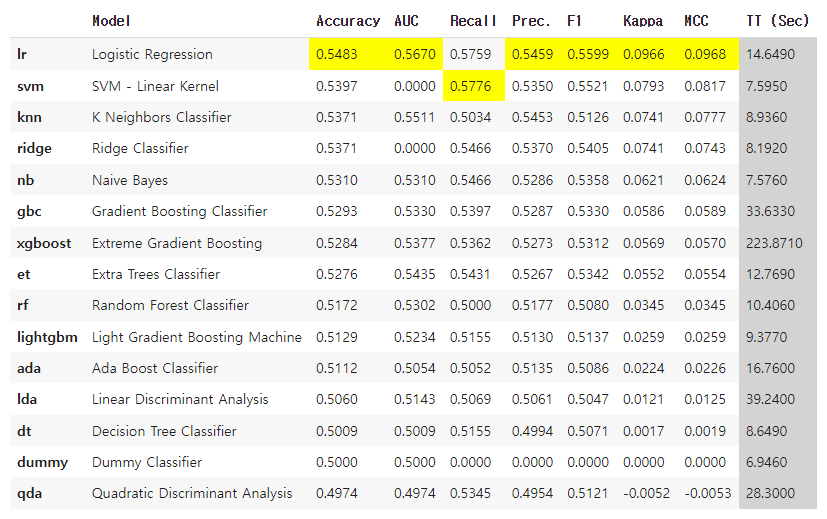

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import StratifiedKFold

In [ ]:
estimators = []

estimators.append(('logistic', best[0]))
estimators.append(('svm', best[1]))
estimators.append(('knn', best[2]))
estimators.append(('ridge', best[3]))
estimators.append(('nb', best[4]))

meta_model = LogisticRegressionCV()
stacking_model = StackingClassifier(estimators, final_estimator = meta_model)

scores = cross_val_score(stacking_model, np.asarray(X_train), Y_train, cv = StratifiedKFold())
scores.mean()

0614_2.PNG

In [ ]:
stacking_model.fit(np.asarray(X_train), Y_train)
pred = stacking_model.predict(np.asarray(X_test))
pred[:50]

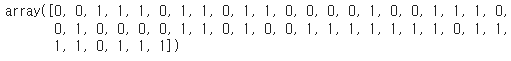

In [ ]:
submit = pd.read_csv('./sample_submission.csv')
submit['first_party_winner'] = pred
submit.to_csv('./20230614_result.csv', index=False)

In [ ]:
under_train_enc = undersampled_df.iloc[:, 6:]
under_train_enc.head()

,court,first_simple_cat,second_simple_cat
0,Appeal,individual,private
1,Supreme,private,individual
2,Appeal,individual,private
3,Appeal,individual,government
4,Appeal,individual,individual


In [ ]:
under_train_enc = pd.get_dummies(under_train_enc)
under_train_enc

,court_Appeal,court_Supreme,first_simple_cat_government,first_simple_cat_individual,first_simple_cat_private,second_simple_cat_government,second_simple_cat_individual,second_simple_cat_private
0,1,0,0,1,0,0,0,1
1,0,1,0,0,1,0,1,0
2,1,0,0,1,0,0,0,1
3,1,0,0,1,0,1,0,0
4,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...
1653,1,0,0,0,1,0,1,0
1654,1,0,1,0,0,0,1,0
1655,1,0,0,1,0,1,0,0
1656,1,0,1,0,0,0,1,0


In [ ]:
train_vec_enc = np.concatenate([np.asarray(X_train), under_train_enc], axis = 1)
train_vec_enc

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [ ]:
train_vec_enc.shape

(1658, 43079)

In [ ]:
classification.setup(data = train_vec_enc, target = Y_train)

,Description,Value
0,Session id,559
1,Target,first_party_winner
2,Target type,Binary
3,Original data shape,"(1658, 43080)"
4,Transformed data shape,"(1658, 43080)"
5,Transformed train set shape,"(1160, 43080)"
6,Transformed test set shape,"(498, 43080)"
7,Numeric features,43079
8,Preprocess,True
9,Imputation type,simple


In [ ]:
best = classification.compare_models(n_select=5, fold=5)

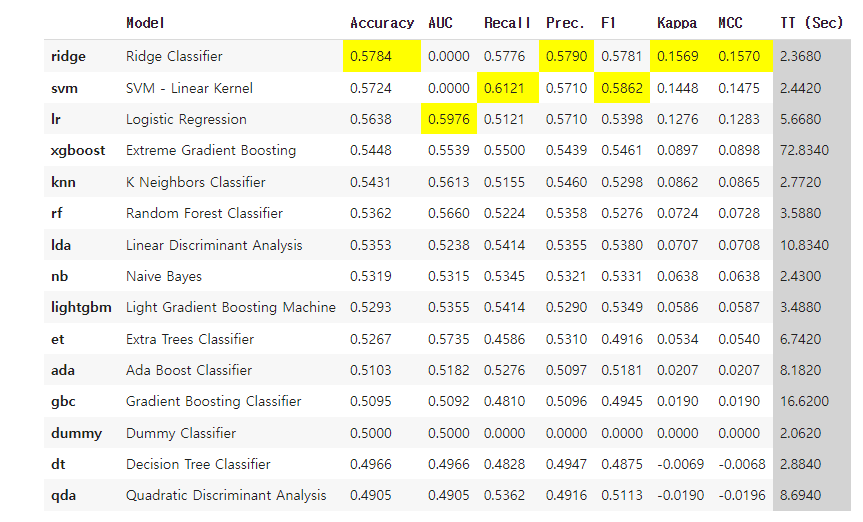

In [ ]:
test_enc = test.iloc[:, 5:]
test_enc = pd.get_dummies(test_enc)
test_vec_enc = np.concatenate([np.asarray(X_test), test_enc], axis = 1)
test_vec_enc

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [ ]:
estimators = []

estimators.append(('logistic', best[0]))
estimators.append(('rf', best[1]))
estimators.append(('dart', best[2]))

In [ ]:
meta_model = LogisticRegressionCV()
stacking_model = StackingClassifier(estimators, final_estimator = meta_model)

In [ ]:
scores = cross_val_score(stacking_model, train_vec_enc, Y_train, cv = StratifiedKFold())
scores.mean()

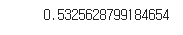

In [ ]:
stacking_model.fit(train_vec_enc, Y_train)
pred_2 = stacking_model.predict(test_vec_enc)
pred_2

0613_3.PNG

In [ ]:
pred_2[:50]

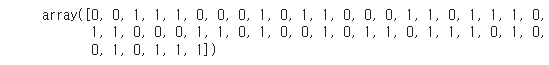

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/data/데이콘 판결/Categorized/new_test.csv')
df_train = pd.read_csv('/content/train.csv')
train['first_party_winner'] = df_train['first_party_winner']
df_train = df_train.drop('ID',axis = 1)
df_test1 = df_test.drop('ID',axis = 1)

In [ ]:
df_train['first_party'].replace('\.', '', regex=True, inplace=True)
df_train['second_party'].replace('\.', '', regex=True, inplace=True)

In [ ]:
import re

def cleaning_dots(df = df_train, col_name = 'first_party'):
    df = df
    for index, row in df.iterrows():
        name = row[col_name]
        name_split = name.split(' ')

        facts = row['facts']
        facts = facts.replace('\n', '')
        df.at[index, 'facts'] = facts

        facts_split = facts.split(' ')

        words_to_clean = ["U.", "S.", "Mr.", "Ms.", "Mrs.", "Miss.", "U.S." ]

        for name_word in name_split:
            for i, fact_word in enumerate(facts_split):
                if name_word == re.sub(r'[^\w\s]$', '', fact_word):
                    cleaned_word = re.sub(r'[^\w\s]$', '', fact_word)
                    df.at[index, 'facts'] = df.at[index, 'facts'].replace(fact_word, cleaned_word)

                if fact_word == 'U.S.':
                    df.at[index, 'facts'] = df.at[index, 'facts'].replace(fact_word, 'US')

                if fact_word in words_to_clean:
                    cleaned_word = fact_word.replace('.', '')
                    df.at[index, 'facts'] = df.at[index, 'facts'].replace(fact_word, cleaned_word)

        if df.at[index, 'facts'].endswith('.'):
            df.at[index, 'facts'] = df.at[index, 'facts'][:-1]

    return df

In [ ]:
df_train = cleaning_dots(df = df_train,col_name = 'first_party')
df_train = cleaning_dots(df = df_train,col_name = 'second_party')
df_test1 = cleaning_dots(df = df_test,col_name = 'first_party')
df_test1 = cleaning_dots(df = df_test,col_name = 'second_party')

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def remove_stopwords_and_commas(sentence):
    tokens = word_tokenize(sentence)
    filtered_sentence = [word for word in tokens if not word in stop_words and word != ',']
    return ' '.join(filtered_sentence)

In [ ]:
df_train['facts'] = df_train['facts'].apply(lambda x: remove_stopwords_and_commas(x))
df_test1['facts'] = df_test1['facts'].apply(lambda x: remove_stopwords_and_commas(x))

In [ ]:
def remove_short_words(sentence):
    words = str(sentence).split()
    long_words = [word for word in words if len(word) > 2]
    new_sentence = ' '.join(long_words)
    return new_sentence

In [ ]:
df_train['first_party'] = df_train['first_party'].apply(remove_short_words)
df_train['second_party'] = df_train['second_party'].apply(remove_short_words)
df_test1['first_party'] = df_test1['first_party'].apply(remove_short_words)
df_test1['second_party'] = df_test1['second_party'].apply(remove_short_words)

In [ ]:
def replace_names(row):
    facts = row['facts']
    names = row['first_party'].split(' ')
    names2 = row['second_party'].split(' ')
    for name in names:
        if name in facts:
            facts = facts.replace(name, "wizard")
    for name2 in names2:
        if name2 in facts:
            facts = facts.replace(name2, "sorcerer")
    row['facts'] = facts
    return row

In [ ]:
df_train = df_train.apply(replace_names, axis = 1)
df_test1 = df_test1.apply(replace_names, axis = 1)

In [ ]:
!pip install sentencepiece

In [ ]:
!pip install transformers

In [ ]:
!pip install sacremoses

In [ ]:
import sentencepiece
print(sentencepiece.__version__)

In [ ]:
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer

class Translator:
    def __init__(self, model_name):
        self.model = AutoModelForSeq2SeqLM.from_pretrained(model_name)
        self.tokenizer = AutoTokenizer.from_pretrained(model_name)

    def translate(self, text):
        text = text[:self.tokenizer.model_max_length - 1]
        inputs = self.tokenizer.encode(text, return_tensors="pt")
        outputs = self.model.generate(inputs, max_length=512, num_beams=4, early_stopping=True)
        return self.tokenizer.decode(outputs[0])

translator_en_de = Translator('Helsinki-NLP/opus-mt-en-de')
translator_de_en = Translator('Helsinki-NLP/opus-mt-de-en')


def translate_and_back_de(text):
    """Translate English text to German and back to English.

    text: The string to translate

    returns: Translated text
    """
    translated_text = translator_en_de.translate(text)
    translated_back_text = translator_de_en.translate(translated_text)
    return translated_back_text


original_text = 'Hello, world!'
print(f'Original Text: {original_text}')

translated_back_text_de = translate_and_back_de(original_text)
print(f'Translated Back Text (German): {translated_back_text_de}')

In [ ]:
df_train['translated_de'] = df_train['facts'].apply(translate_and_back_de)
df_test1['translated_de'] = df_test1['facts'].apply(translate_and_back_de)

In [ ]:
def weird_words(x):
  x = x.replace('<pad>','')
  return x

In [ ]:
df_train['translated_de'].apply(lambda x : weird_words(x))
df_test1['translated_de'].apply(lambda x : weird_words(x))

In [ ]:
df_test1.to_csv('translated_test1.csv',index = False)
df_train.to_csv('translated1.csv',index = False)

In [ ]:
def swap_words(sentence):
    word_a = 'sorcerer'
    word_b = 'wizard'

    new_sentence = sentence.replace(word_a, 'tempword').replace(word_b, word_a).replace('tempword', word_b)

    return new_sentence

In [ ]:
df_train['swapped'] = df_train['facts'].apply(swap_words)
df_test1['swapped'] = df_test1['facts'].apply(swap_words)

In [ ]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize #Nltk
from transformers import BertTokenizer #Bert
from transformers import RobertaTokenizer, RobertaModel
from transformers import DebertaTokenizer, DebertaForSequenceClassification, Trainer, TrainingArguments
from sklearn.metrics import accuracy_score

In [ ]:
tokenizer = DebertaTokenizer.from_pretrained('microsoft/deberta-base')

In [ ]:
import random

def masking(sentence):
    keywords = ["sorcerer", "wizard"]

    words = sentence.split()

    for i, word in enumerate(words):
        if word.lower() in keywords:
            if random.random() < 0.15:
                words[i] = f"[MASK_{word.upper()}]"

    new_sentence = " ".join(words)

    return new_sentence

In [ ]:
### Masking sorcerer and wizard ###
df_train['facts'] = df_train['facts'].apply(masking)
df_train['swapped'] = df_train['swapped'].apply(masking)
df_test1['facts'] = df_test1['facts'].apply(masking)
df_test1['swapped'] = df_test1['swapped'].apply(masking)

In [ ]:
df_train['translated_de'] = df_train['translated_de'].apply(masking)
df_test1['translated_de'] = df_test1['translated_de'].apply(masking)
tokenizer.add_tokens(["[MASK_SORCERER]", "[MASK_WIZARD]"])

In [ ]:
df_train['facts'] = df_train['facts'].apply(str)
df_train['tokenized_facts'] = df_train['facts'].apply(tokenizer.tokenize)
df_train['swapped'] = df_train['swapped'].apply(str)
df_train['swapped'] = df_train['swapped'].apply(tokenizer.tokenize)

df_test1['facts'] = df_test1['facts'].apply(str)
df_test1['tokenized_facts'] = df_test1['facts'].apply(tokenizer.tokenize)
df_test1['swapped'] = df_test1['swapped'].apply(str)
df_test1['swapped'] = df_test1['swapped'].apply(tokenizer.tokenize)

In [ ]:
df_train['translated_de'].apply(str)
df_test1['translated_de'].apply(str)
df_train['translated_de'] = df_train['translated_de'].apply(tokenizer.tokenize)
df_test1['translated_de'] = df_test1['translated_de'].apply(tokenizer.tokenize)

In [ ]:
train_data = pd.concat([df_train['tokenized_facts'],df_train['swapped']],axis = 0)
train_data =train_data.reset_index(drop = True)

test_data = pd.concat([df_test1['tokenized_facts'],df_test1['swapped']],axis = 0)
test_data = test_data.reset_index(drop = True)

y_train = df_train['first_party_winner'].values
y_train2 = np.abs(df_train['first_party_winner'] -1)

y_train_total = np.concatenate((y_train, y_train2))

In [ ]:
!pip install --upgrade torch transformers

In [ ]:
from transformers import DebertaModel, AdamW, get_linear_schedule_with_warmup
from torch import nn
from torch.utils.data import Dataset, DataLoader
from torch.nn import BCELoss
from sklearn.metrics import accuracy_score
import torch
class CustomDataset(Dataset):
    def __init__(self, input_ids, attention_masks,  labels=None):
        self.input_ids = input_ids
        self.attention_masks = attention_masks
        self.labels = labels

    def __len__(self):
        return len(self.input_ids)

    def __getitem__(self, idx):
        if self.labels is not None:
            return self.input_ids[idx], self.attention_masks[idx],  self.labels[idx]
        else:
            return self.input_ids[idx], self.attention_masks[idx]

class DebertaSequenceClassifier(nn.Module):
    def __init__(self, dropout=0.1):
        super(DebertaSequenceClassifier, self).__init__()
        self.deberta = DebertaModel.from_pretrained('microsoft/deberta-base')
        self.dropout = nn.Dropout(dropout)
        self.fc = nn.Linear(self.deberta.config.hidden_size, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, input_ids, attention_masks):
        outputs = self.deberta(input_ids=input_ids, attention_mask=attention_masks)
        pooled_output = outputs[0][:,0,:]
        dropout_output = self.dropout(pooled_output)

        return self.sigmoid(self.fc(dropout_output))


def encode_sentences(tokenized_sentences, tokenizer, max_length=64):
    input_ids = []
    attention_masks = []

    for tokens in tokenized_sentences:
        ids = tokenizer.convert_tokens_to_ids(tokens)

        ids = [tokenizer.bos_token_id] + ids + [tokenizer.eos_token_id]

        ids = ids[:max_length]
        ids += [tokenizer.pad_token_id] * (max_length - len(ids))

        mask = [int(token_id > 0) for token_id in ids]

        ids = torch.tensor(ids).unsqueeze(0)
        mask = torch.tensor(mask).unsqueeze(0)

        input_ids.append(ids)
        attention_masks.append(mask)

    input_ids = torch.cat(input_ids, dim=0)
    attention_masks = torch.cat(attention_masks, dim=0)

    return input_ids, attention_masks

In [ ]:
prediction1 = predictions[:1240]
prediction2 = predictions[1240:]
type(prediction1)

In [ ]:
prediction_one = np.round(np.array(prediction1))

prediction_final = np.round((np.array(prediction1) + np.array(prediction2))/2)
prediction_final = prediction_final.astype(int)

In [ ]:
submission = pd.concat([df_test['ID'],pd.DataFrame(prediction_one)],axis = 1)
submission.columns = ['ID','first_party_winner']
submission.to_csv('deberta_preprocessed_one.csv',index = False)
submission[submission['first_party_winner'] == 0]